In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
from datetime import datetime

# Loading Data

In [ ]:
insert_to_mgdb_from_excel("SEKMAD.csv")
insert_to_mgdb_from_excel("EURMAD.csv")
insert_to_mgdb_from_excel("AUDMAD.csv")
insert_to_mgdb_from_excel("USDMAD.csv")
insert_to_mgdb_from_excel("GBPMAD.csv")
insert_to_mgdb_from_excel("MGAMAD.csv")
insert_to_mgdb_from_excel("CHFMAD.csv")

In [27]:
USDMAD = read_mgdb_data("USDMAD")
GBPMAD = read_mgdb_data("GBPMAD")
EURMAD = read_mgdb_data("EURMAD")
AEDMAD = read_mgdb_data("AEDMAD")
SEKMAD = read_mgdb_data("SEKMAD")
MGAMAD = read_mgdb_data("MGAMAD")

In [36]:
tickers = ["USDMAD", "EURMAD","MGAMAD"]
dfs = [USDMAD, EURMAD, MGAMAD]

In [38]:
# Creation d'un dataframe qui rassemble tout les taux de cloture
PX_LAST = USDMAD
for ticker in dfs[1:]:
    PX_LAST = pd.merge(PX_LAST, ticker, on='Date',how='outer')
PX_LAST = PX_LAST.sort_index()

In [39]:
# Calcule de la performance des données
PX_LAST = PX_LAST.ffill().bfill()
returns = PX_LAST/PX_LAST.shift(1) - 1

# Calcul de l'excess return des taux de change

En d'autres termes on va rebaser nos taux à un niveau de reférence de 1000

In [40]:
CERL = pd.DataFrame(index=PX_LAST.index, columns=PX_LAST.columns )
base_date = datetime(2003,12,1)
base_level = 1000
for ticker in tickers:
    CERL.loc[base_date, ticker] = base_level

In [41]:
t_1 = base_date
for t in CERL.index[1:]:
    CERL.loc[t] = CERL.loc[t_1]*(1+returns.loc[t])
    t_1 = t

In [42]:
CERL

USDMAD   EURMAD   MGAMAD
Date                                 
2003-12-01     1000     1000     1000
2003-12-02   998.74  1009.01     1000
2003-12-03  990.357  1003.36     1000
2003-12-04  988.056   997.39     1000
2003-12-05  984.374  1002.56     1000
...             ...      ...      ...
2022-02-24  1038.34  971.083   495.52
2022-02-25  1041.03  975.298  496.178
2022-02-26  1035.28  975.298  496.724
2022-02-27  1035.28  975.298  496.724
2022-02-28  1046.12  981.289  498.606

[5430 rows x 3 columns]

# Components Excess Return Level

<AxesSubplot:xlabel='Date'>

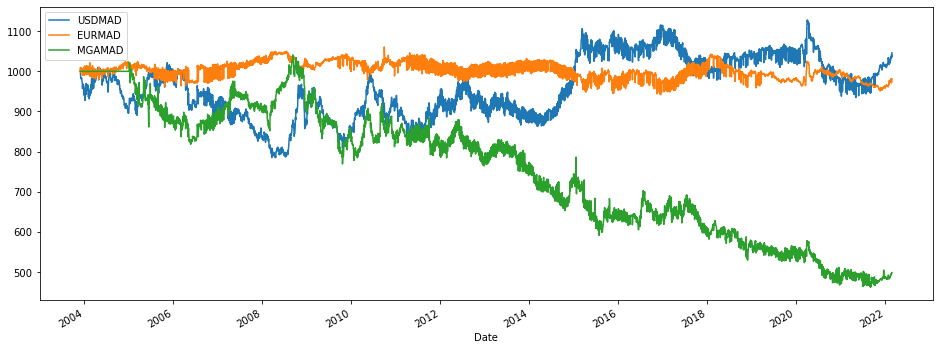

In [43]:
CERL.plot(figsize=(16,6))

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

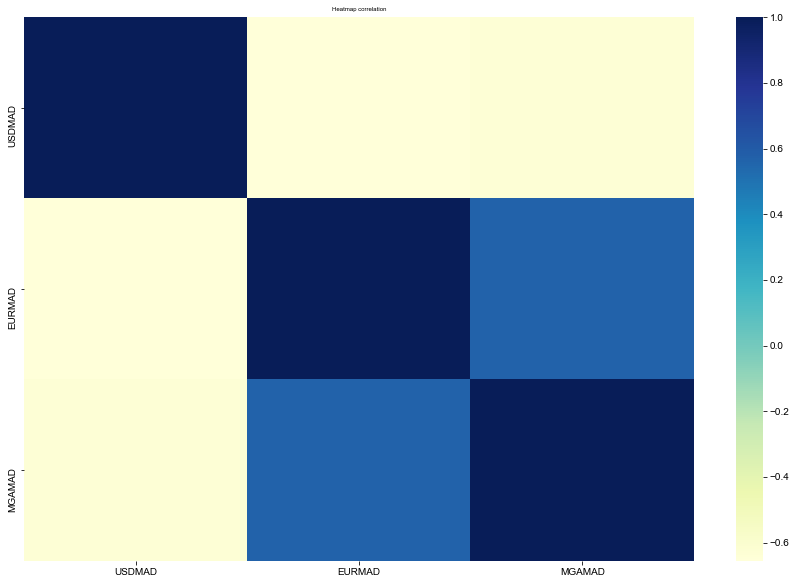

In [45]:
corr = CERL.astype("float64").corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="YlGnBu") 
sns.set(font_scale=0.5,style='white')

plt.title('Heatmap correlation')
plt.show()

# Comments

1- On peut remarquer que la variation du taux EUR/MAD est nettement moins importante que pour le reste des devises, en effet, le dirham marocain n’est pas une monnaie librement convertible. Il est semi-flexible. Avant avril 2015, la monnaie marocaine fut indexé à 80 % sur l'euro et 20 % sur le dollar,(*où le dirham courant est égal à l'inverse du cours de référence de l’euro multiplié par 80 %, plus l'inverse du cours de référence du dollar multiplié par 20 %. Le résultat de cette addition est multiplié par le résultat du rapport entre le cours de l'euro sur celui du dollar*). Depuis le 13 avril 2015, le dirham est indexé par rapport à un panier basé à 40 % sur le dollar et à 60 % sur l'euro.

2- Le cours du dollar américain et celui du dirham d'emirates est parfaitement correlé, ceci est normal car l'AED et l'USD s'échangent à un taux fixe de 0.27 USD contre 1 AED.

3- Les courbes de taux ne se comportent pas de la meme facon en periode de crise, mais ceci dépends beaucoup aussi du type de crise, on remarque ainsi que: 
- pendant la periode de 2007-2008 la courbe de l'USD représente une pente imprtante et négative, c'est la periode de la crise des subprimes, cette crise n'avait pas encore ateint l'europe en cette période, mais en fin 2008, alors que l'USD reprend en valeure, on remarque une forte baisse des devises européènes impactées par la crise. 
- Alors que dans les années 2014-2015 À la suite de l'annexion de la Crimée par la Russie, des sanctions économiques de la part de l'Europe et de la baisse de prix du pétrole, le rouble russe connait un krach qui aura des répercussions économiques très graves pour la Russie dont la mise en faillite de plus d'une soixantaine d'établissements financiers et d'une longue période de récession. Cette crise impacta differament chaque pays, avec une forte hausse pour l'USD et le GBP contre une forte baisse pour l'euro et le SEK.
- Pour la crise de mars 2020 du au Covid, on remarque un fort pique positif pour l'euro et l'USD contre une forte baisse four le GBP et le SEK. 

4- On remarque une forte correlation entre le taux de change EURMAD et XAFMAD, à la diférence où le taux XAFMAD reste plus volatile.

# Skewness Coefficcient

In [51]:
CERL = pd.DataFrame(index=PX_LAST.index, columns=PX_LAST.columns )
base_date = datetime(2003,12,1)
base_level = 1000
for ticker in tickers:
    CERL.loc[base_date, ticker] = base_level
t_1 = base_date
for t in CERL.index[1:]:
    CERL.loc[t] = CERL.loc[t_1]*(1+returns.loc[t])
    t_1 = t

In [52]:
def moment_ordre_n(df, n):
    mean = df.mean()
    df = df - mean
    df = df.pow(n)
    moment = df.mean()
    return(moment)

In [53]:
def skewness_coef(df):
    moment_ordre_3 = moment_ordre_n(df, 3)
    std = df.std()
    skewness = moment_ordre_3/(std.pow(3))
    return(skewness)

In [54]:
skewness_coeficient = skewness_coef(CERL)

In [55]:
skewness_coeficient

USDMAD   -0.097050
EURMAD   -0.158540
MGAMAD   -0.089278
dtype: float64

L'interprétation de ce coeFicient, qui permet de mesurer l'asymétrie d'une distribution, est la suivante :
- γ1 = 0 : distribution symétrique,
- γ1 > 0 : distribution oblique à gauche,
- γ1 < 0 : distribution oblique à droi

# Coeffcient de Kurtos

In [56]:
def kurtos_coef(df):
    moment_ordre_4 = moment_ordre_n(df, 4)
    std = df.std()
    kurtos = moment_ordre_4/std.pow(4)
    return(kurtos)

In [57]:
kurtos_coefficient = kurtos_coef(CERL)

In [58]:
kurtos_coefficient

USDMAD    2.120703
EURMAD    2.461982
MGAMAD    1.746911
dtype: float64

L'interprétation de ce coefficient, qui permet de mesurer la concentration centrale d'une distribution, est la suivante :
- γ2 = 3 : distribution mésocurtique (i.e. aussi concentrée que sous hypothèse de normalité),
- γ2 > 3 : distribution leptocurtique (i.e. moins concentrée que sous hypothèse de normalité),
- γ2 < 3 : distribution platicurtique (i.e. plus concentrée que sous hypothèse de normalité)

# Analyse des Log rendments

In [59]:
import numpy as np

In [60]:
log_returns = np.log(returns+1)

# Calcul du quantile à 95%

In [61]:
quantile95 = np.abs(log_returns).quantile(0.95)
quantile95

USDMAD    0.030569
EURMAD    0.028210
MGAMAD    0.033018
Name: 0.95, dtype: float64

In [62]:
import matplotlib.pyplot as plt

In [63]:
import seaborn as sns

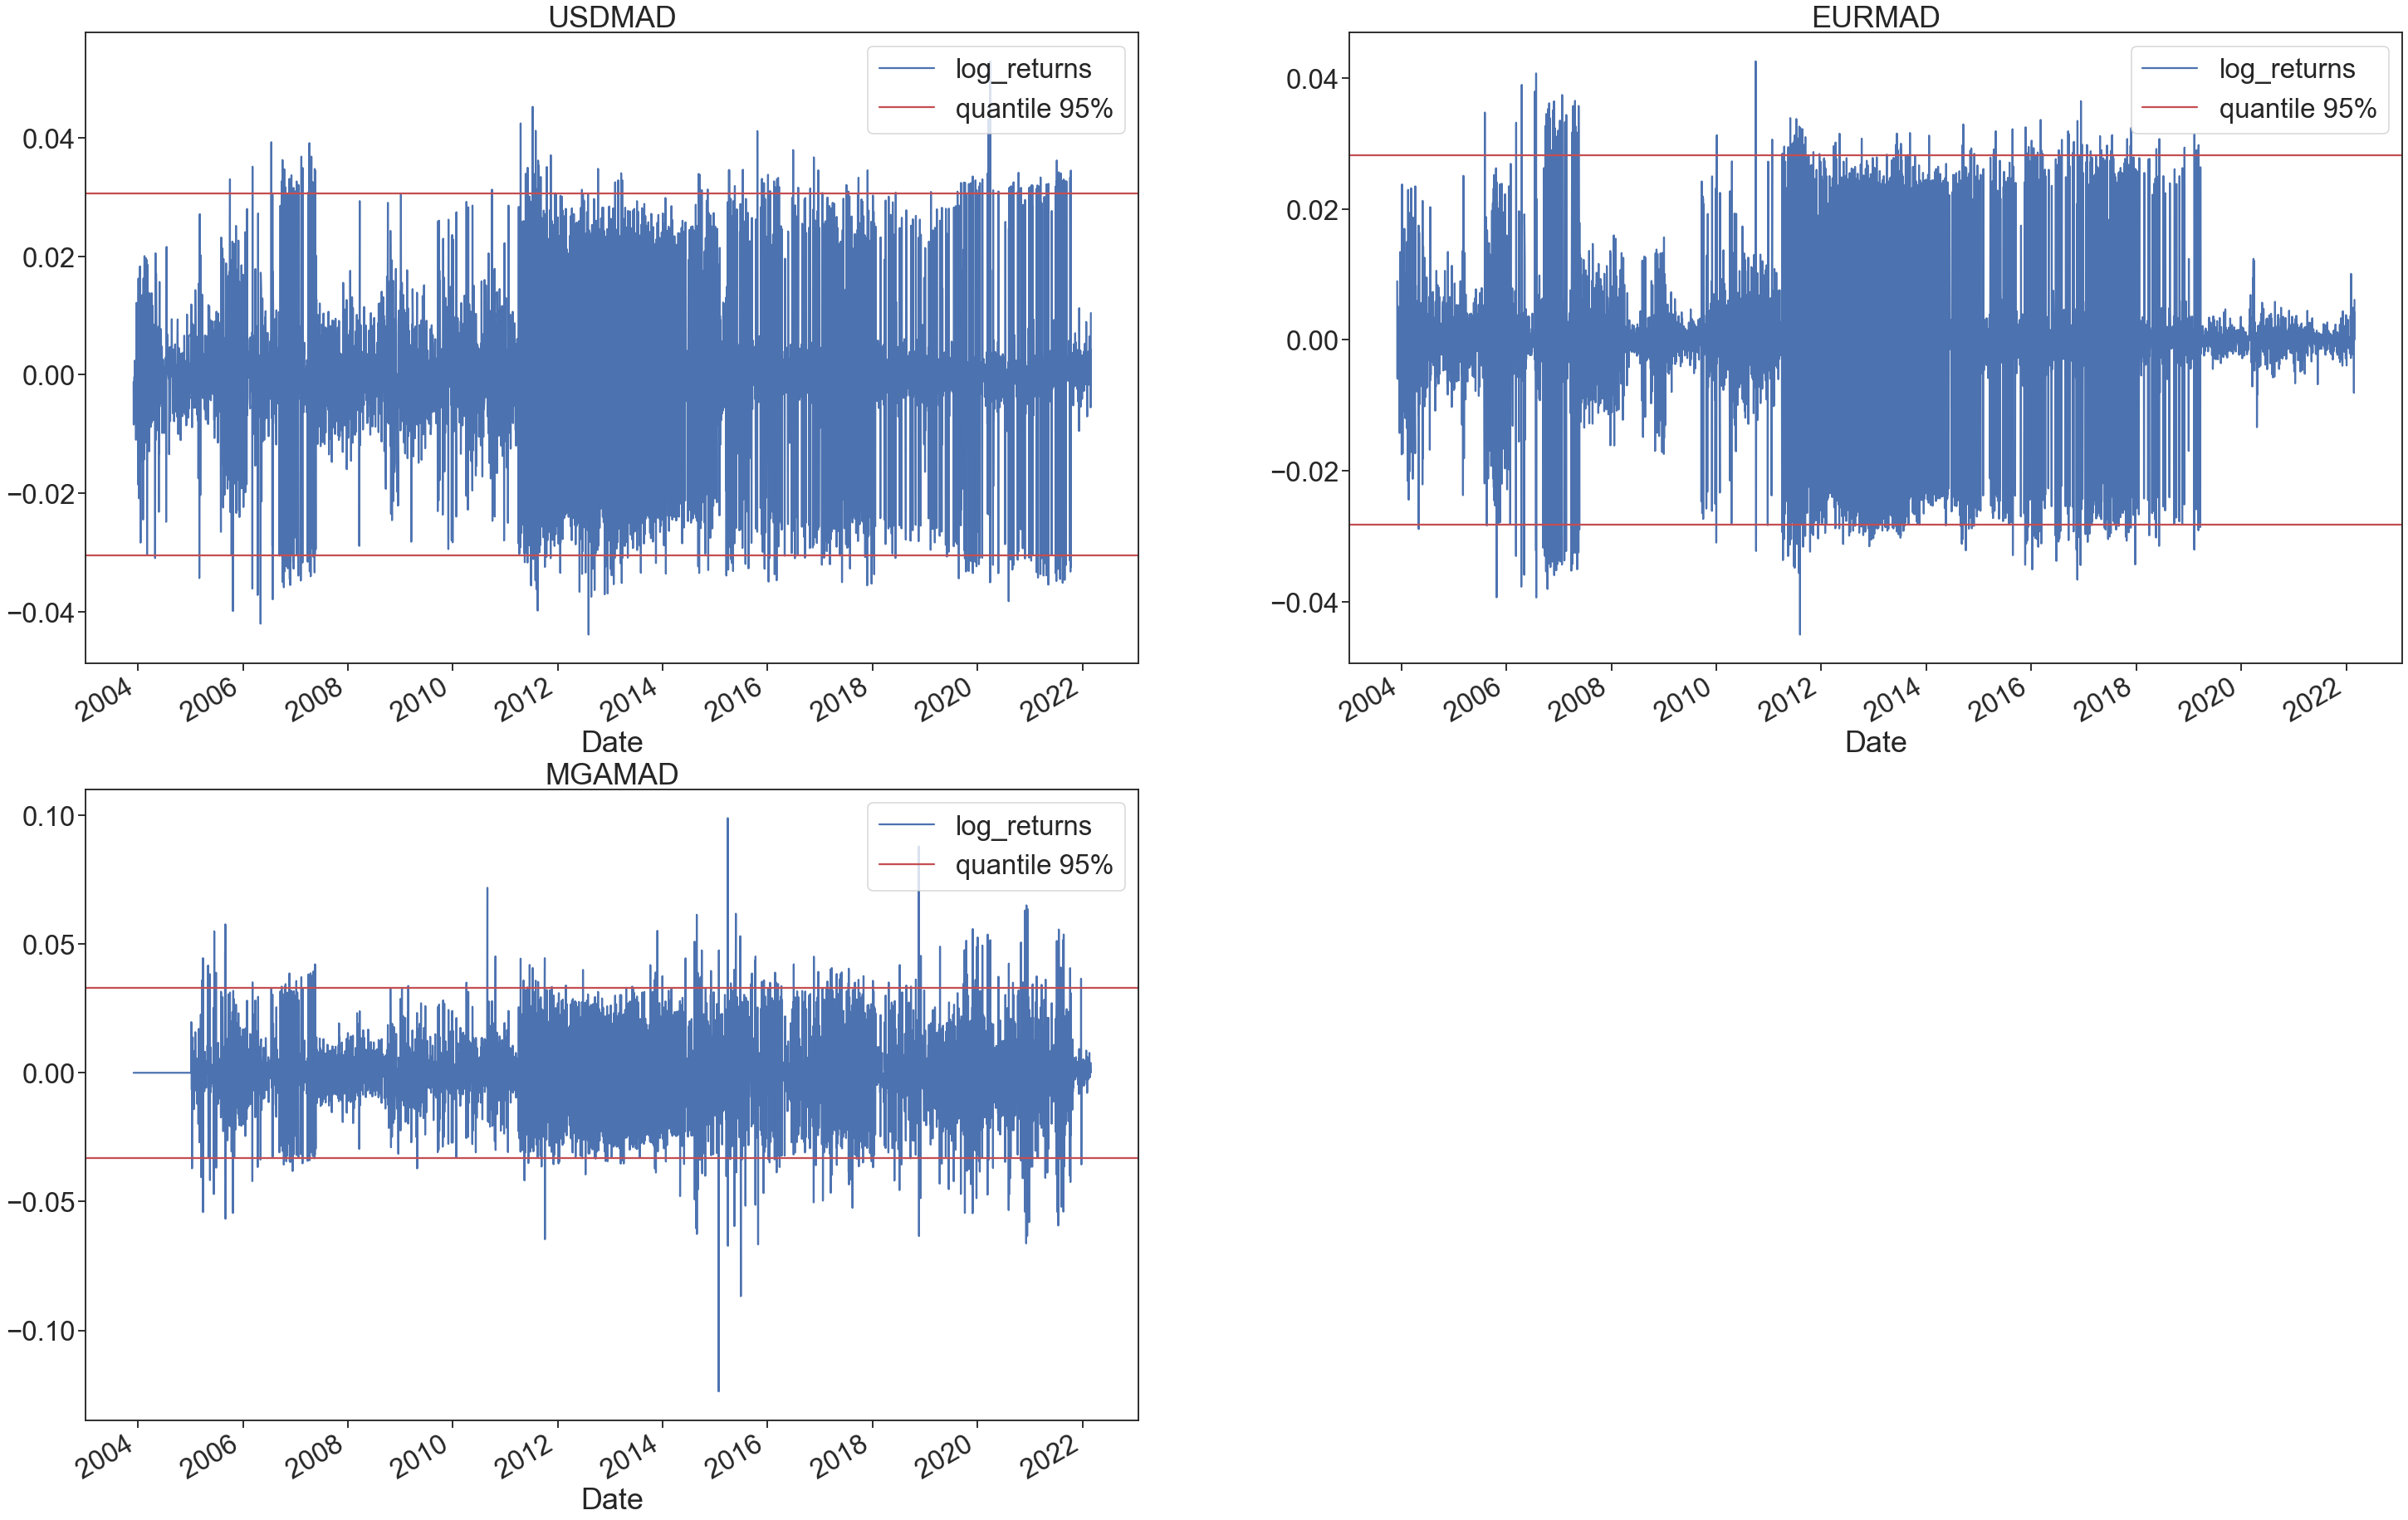

In [64]:
i = 1
sns.set(style="ticks", context="talk",font_scale = 2)
plt.figure(figsize=(50, 90))
#plt.subplots_adjust(wspace=0.4,hspace=0.5)
for ticker in tickers:
    plt.subplot(5,2,i)
    log_returns[ticker].plot(label="log_returns")
    plt.axhline(quantile95[ticker], color='r', label="quantile 95%", linestyle='-')
    plt.axhline(-quantile95[ticker], color='r', linestyle='-')
    plt.title(ticker)
    l = plt.legend(loc ='upper right')
    i = i +1

In [65]:
sns.set(style="ticks", context="talk",font_scale = 1)

In [66]:
skewness_coef(log_returns)

USDMAD   -0.028799
EURMAD   -0.091351
MGAMAD   -0.100060
dtype: float64

In [67]:
 kurtos_coef(log_returns)

USDMAD    4.428739
EURMAD    5.382664
MGAMAD    6.105334
dtype: float64

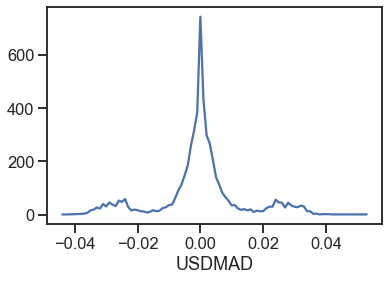

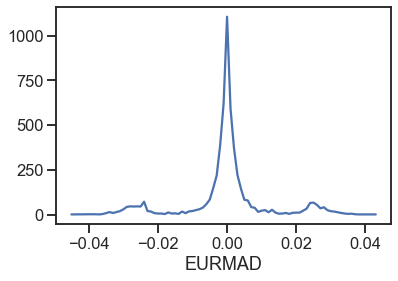

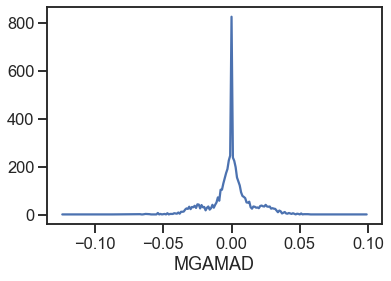

In [68]:
for ticker in tickers:
    log_returns[ticker].groupby(log_returns[ticker].round(3)).count().plot()
    plt.show()

# Comments

-On remarque clairement des pics dans la distribution des log rendements, d'où la distribution n'est pas log-normale

# Qantile-Quantile plot

In [69]:
import statsmodels.api as sm

Un graphique quantile-quantile (QQ-plot) permet d'étudier l'adéquation de la distribution d'une variable à une loi théorique.
Ici, l'axe des abscisses porte les quantiles de la loi théorique, tandis que l'axe des ordonnées porte
ceux de la distribution empirique. Si le nuage de points s'aligne sur la première bissectrice, alors la
loi théorique semble acceptable pour la variable considérée.

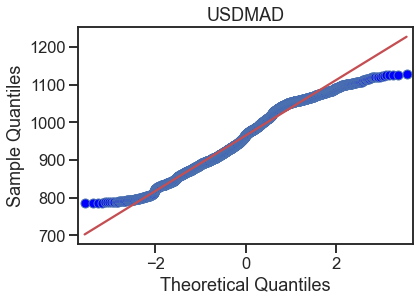

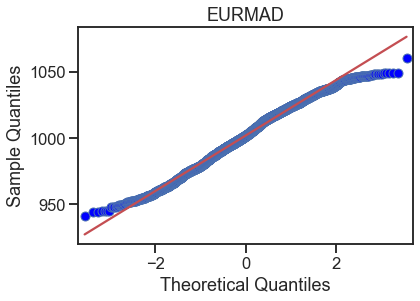

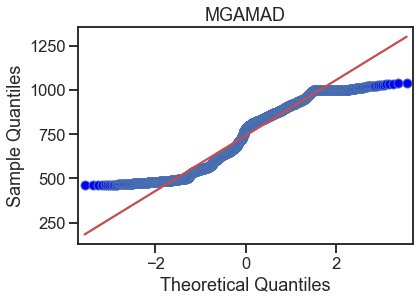

In [70]:
for ticker in tickers:
    sm.qqplot(CERL[ticker], line = "r")
    plt.title(ticker)
    plt.show()

L'analyse statistique des taux de change nous a permis de remarquer que la distribution des logrendements 
ne suivait pas une loi normale. 
cela est dù generalement à deux facteurs:
- Les scenarios extèmes arrivent plus souvent que ce que prédit la loi normale.
- la distribution des taux n'est pas tout a fait symetrique, on remarque que les distributions ont des queues grasses.
![fat_tail]("fat_tail.jpeg")

# Removing extreme values

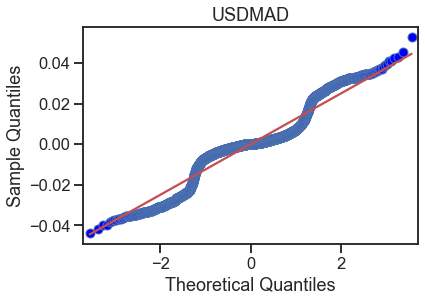

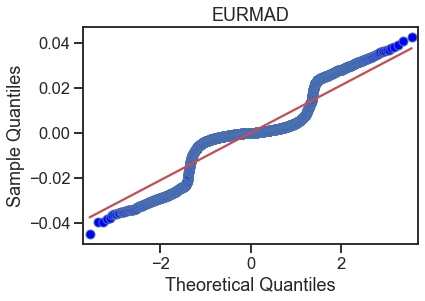

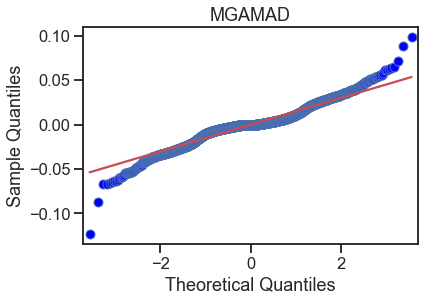

In [71]:
for ticker in tickers:
    series= log_returns[ticker].loc[((quantile95[ticker])>log_returns[ticker])|(log_returns[ticker]>(-quantile95[ticker]))]
    sm.qqplot(series, line = "r")
    plt.title(ticker)
    plt.show

*******************************************************************************************
---------------------------------------------------------
-------------------------------------------------------
--------------------------------------------------

In [72]:
import seaborn as sns
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import warnings

<AxesSubplot:xlabel='Date'>

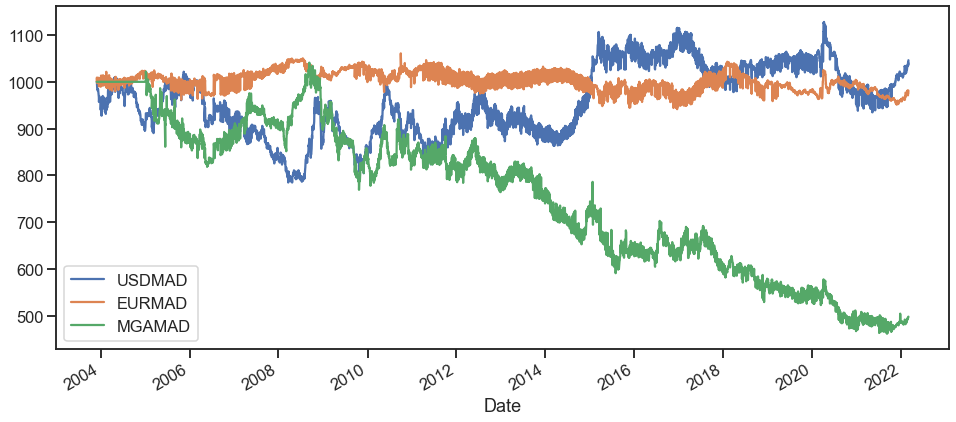

In [73]:
CERL.plot(figsize=(16,7))

# Smoothing the curves

Cette methode de determinantion de tendance nous permet d'eliminer le bruit de notre serie afin voir plus clairement ses variations à moyen et à long terme.
Le filtre de Hodrick-Prescott (HP) est devenu une référence pour se débarrasser des mouvements de tendance dans les données. Cette méthode est largement utilisée pour les méthodes économétriques dans la recherche en macroéconomie appliquée. La technique est non paramétrique et est utilisée pour dissoudre une série temporelle dans une spécification.

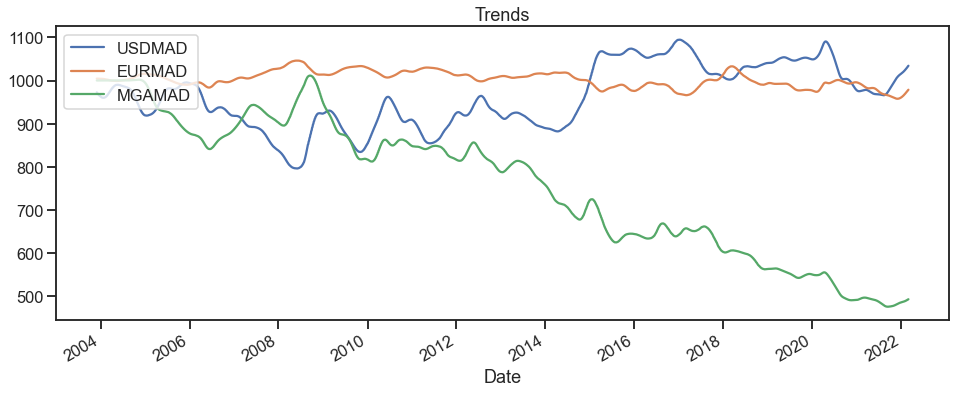

In [74]:
for ticker in tickers:
    _, trend = hpfilter(CERL[ticker], lamb=200000)
    trend.plot(figsize=(16,6), label=ticker)
    plt.title("Trends")
plt.legend(loc ='upper left')
plt.show()

# Detrending the signal

In [33]:
from scipy import signal

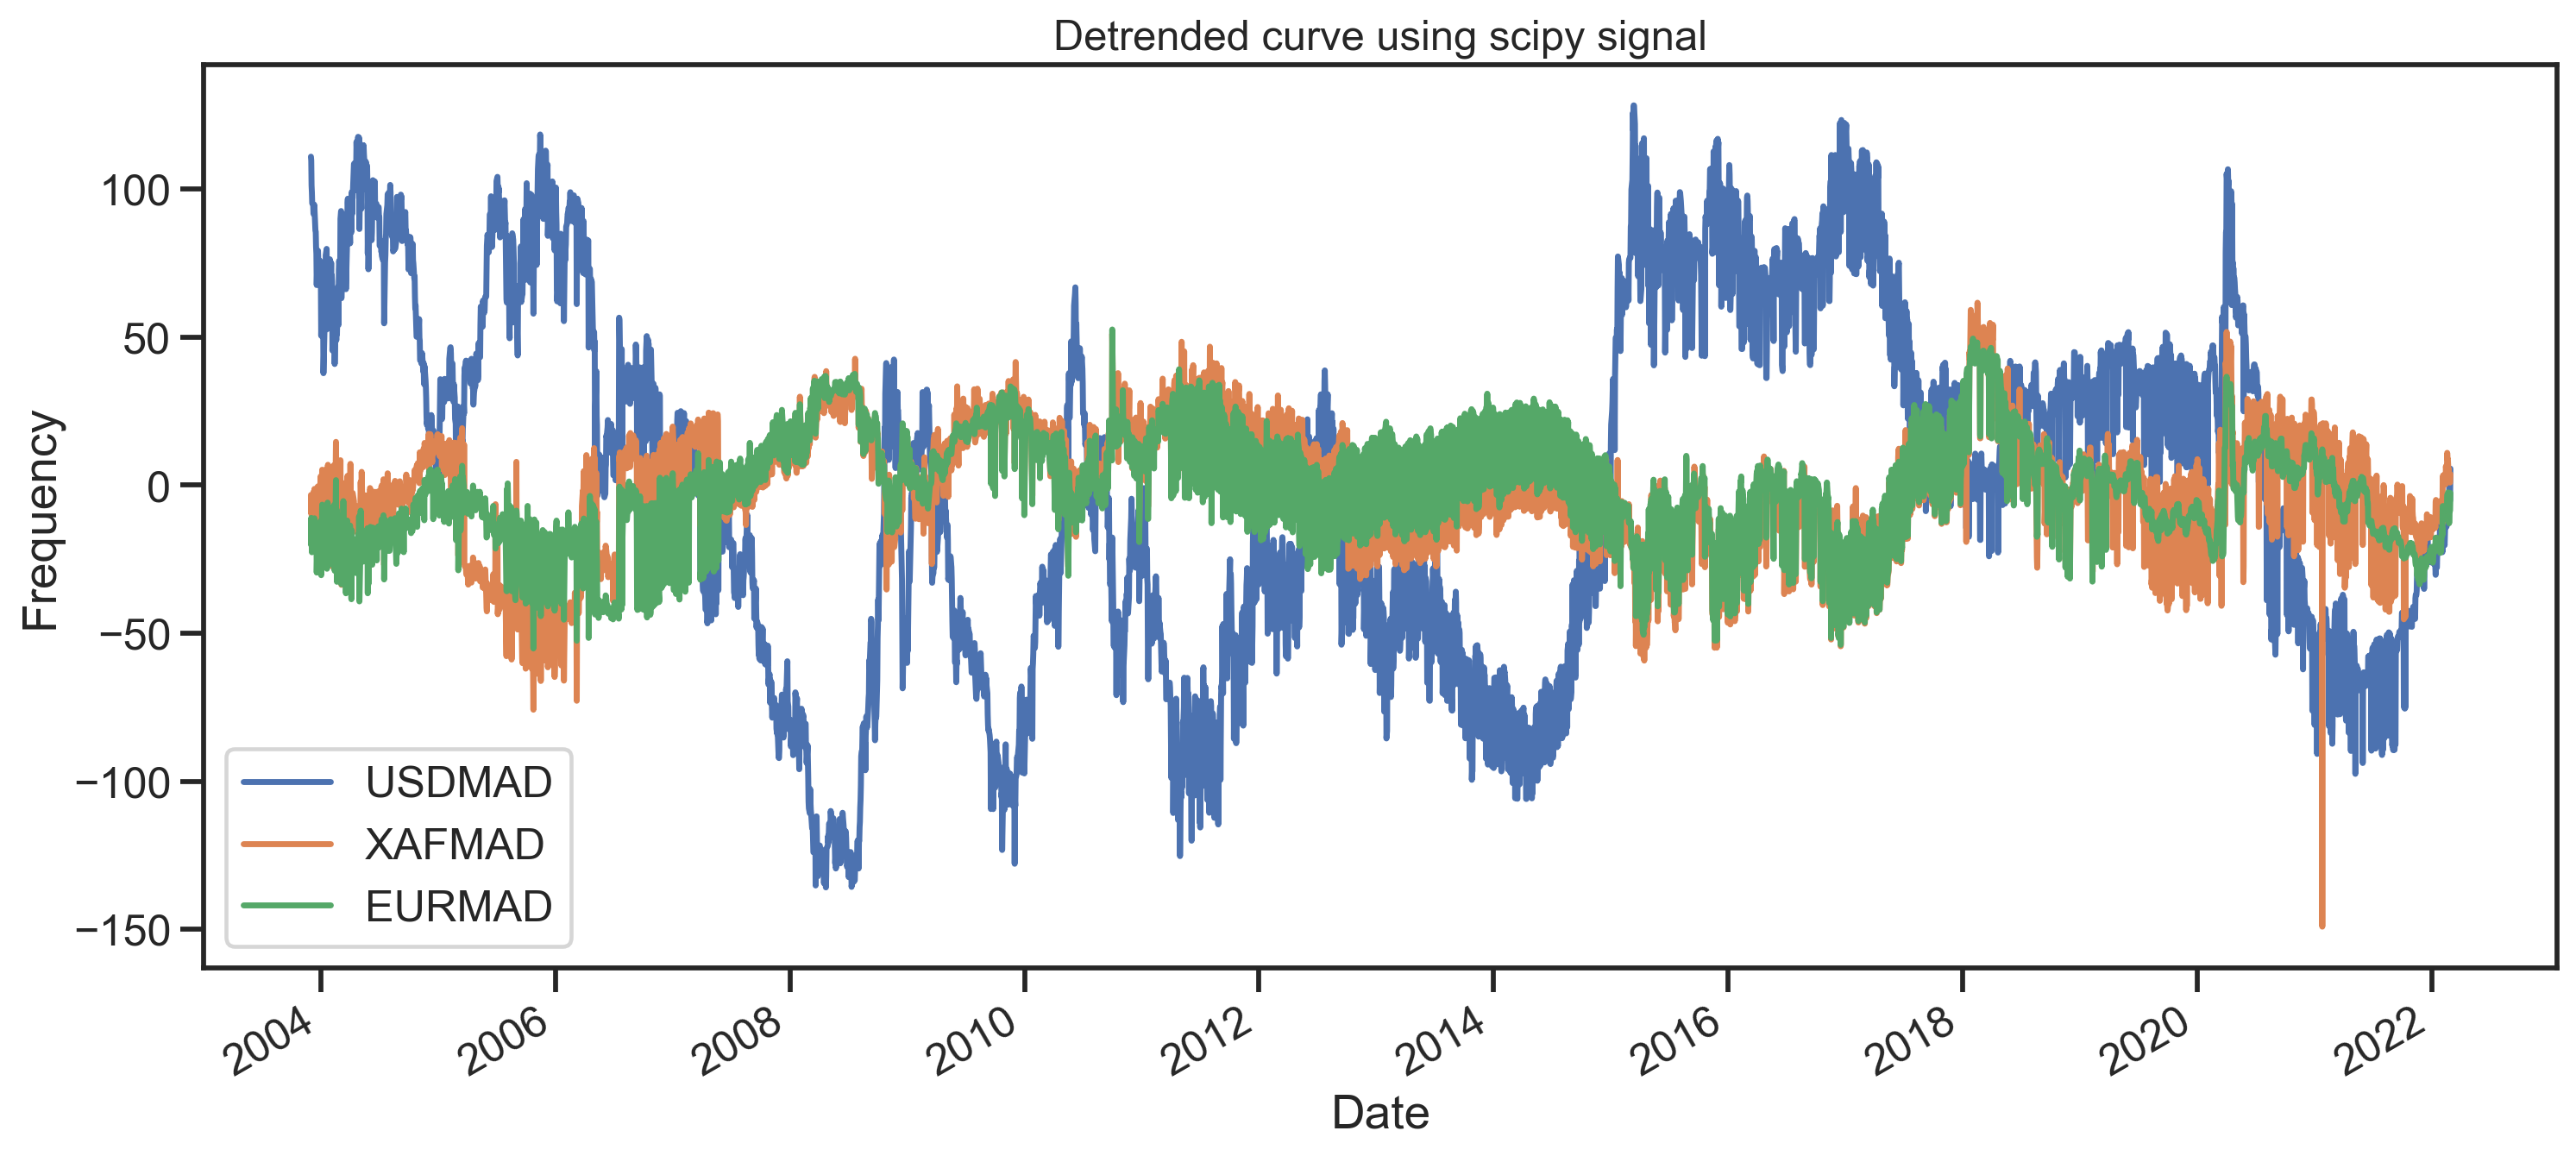

In [75]:
detrended = pd.DataFrame(index=CERL.index, columns=CERL.columns)
for ticker in tickers:
    detrended[ticker] = pd.Series(signal.detrend(CERL[ticker]), index=detrended.index)

detrended.plot(figsize=(16,7))
plt.xlabel("Date")
plt.ylabel('Frequency')
plt.title("Detrended curve using scipy signal", fontsize=16)
plt.show()

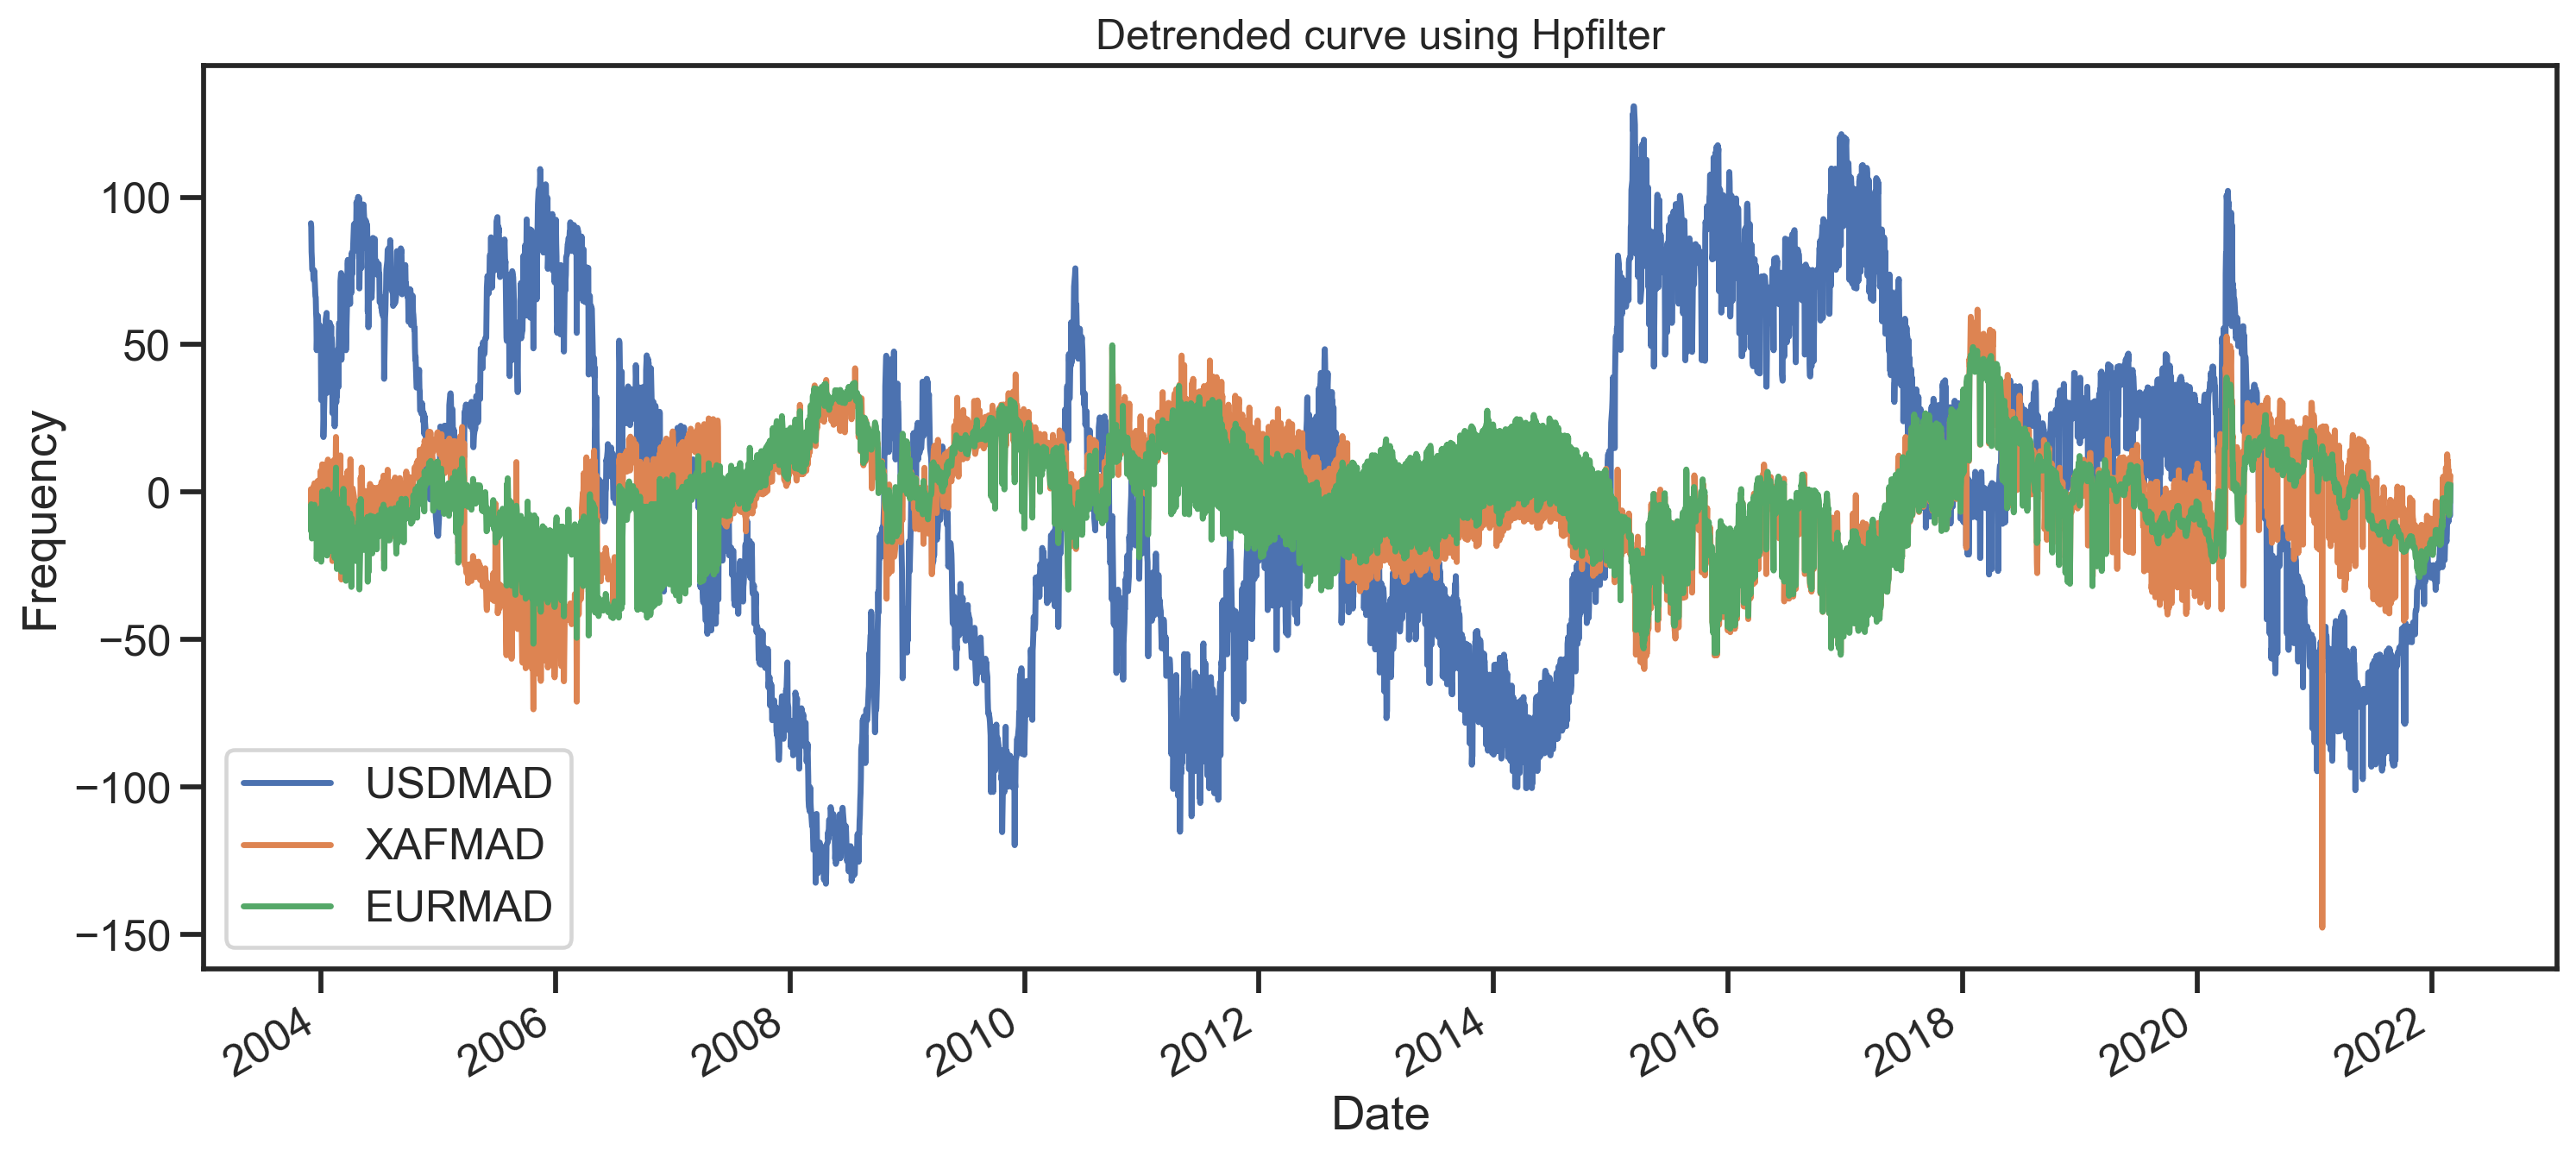

In [76]:
detrended = pd.DataFrame(index=CERL.index, columns=CERL.columns)
for ticker in tickers:
    _, trend = hpfilter(CERL[ticker], lamb=2e12)
    detrended[ticker] = CERL[ticker] - trend

detrended.plot(figsize=(16,7))
plt.xlabel("Date")
plt.ylabel('Frequency')
plt.title("Detrended curve using Hpfilter", fontsize=16)
plt.show()

# Box plot

On peut aussi utiliser un boxplot pour reperer la saisonalité monsuelle des données, un box plot représente respectivement 25%, 50% et 75% de l'échantillon, les point aux extrémités représentent les données anormales. 

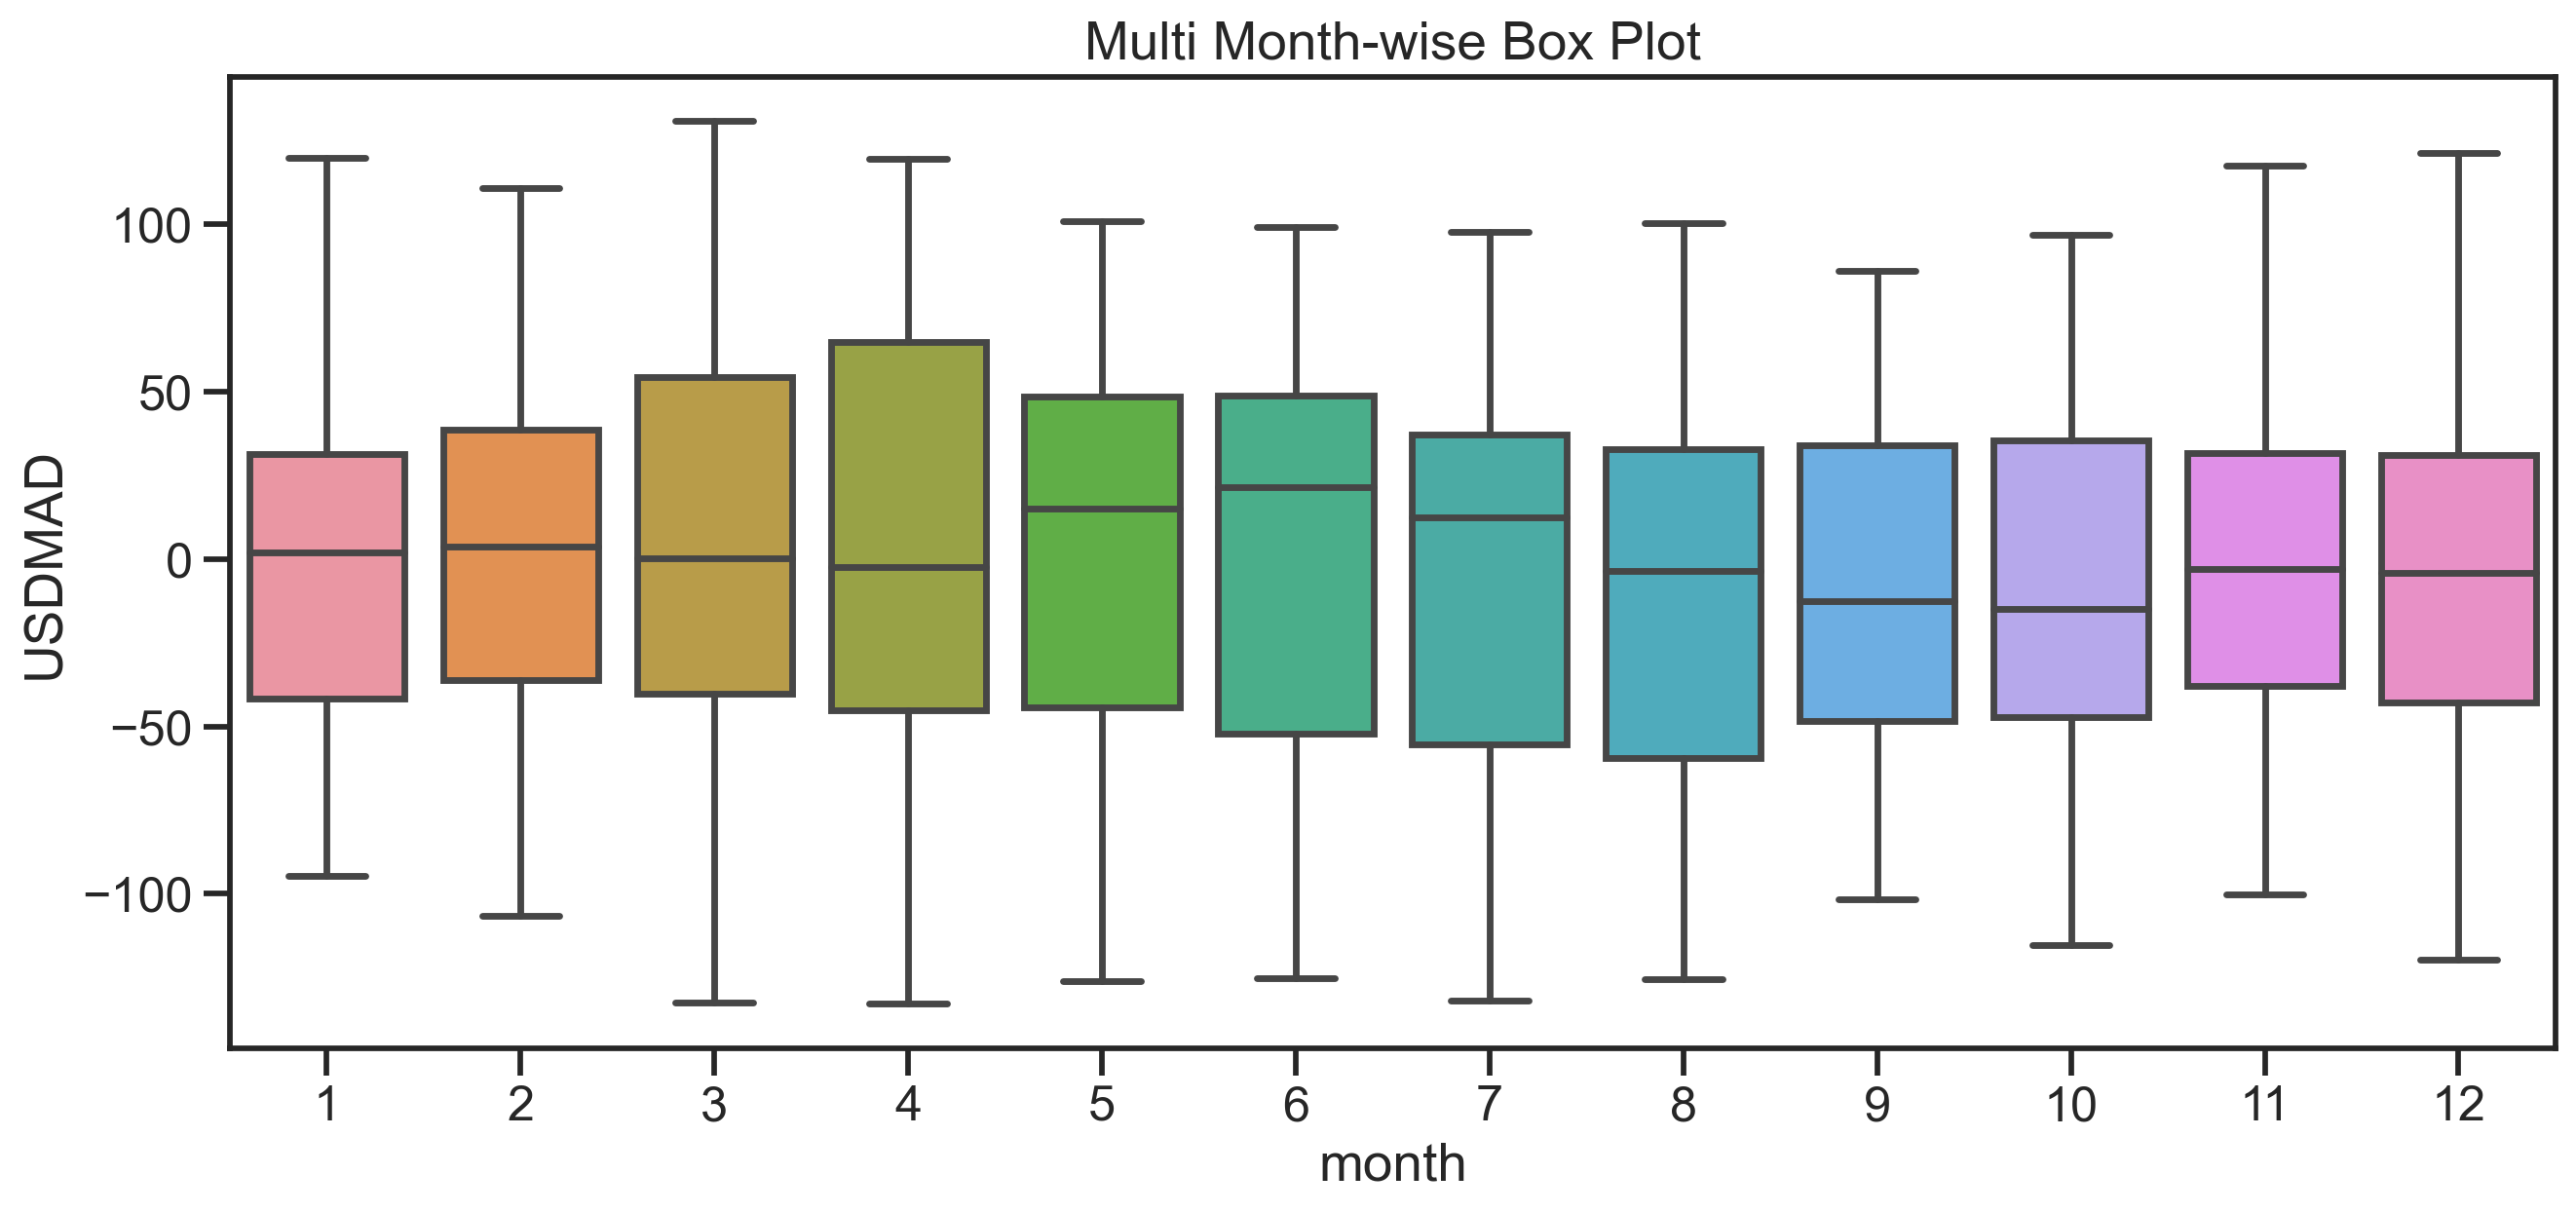

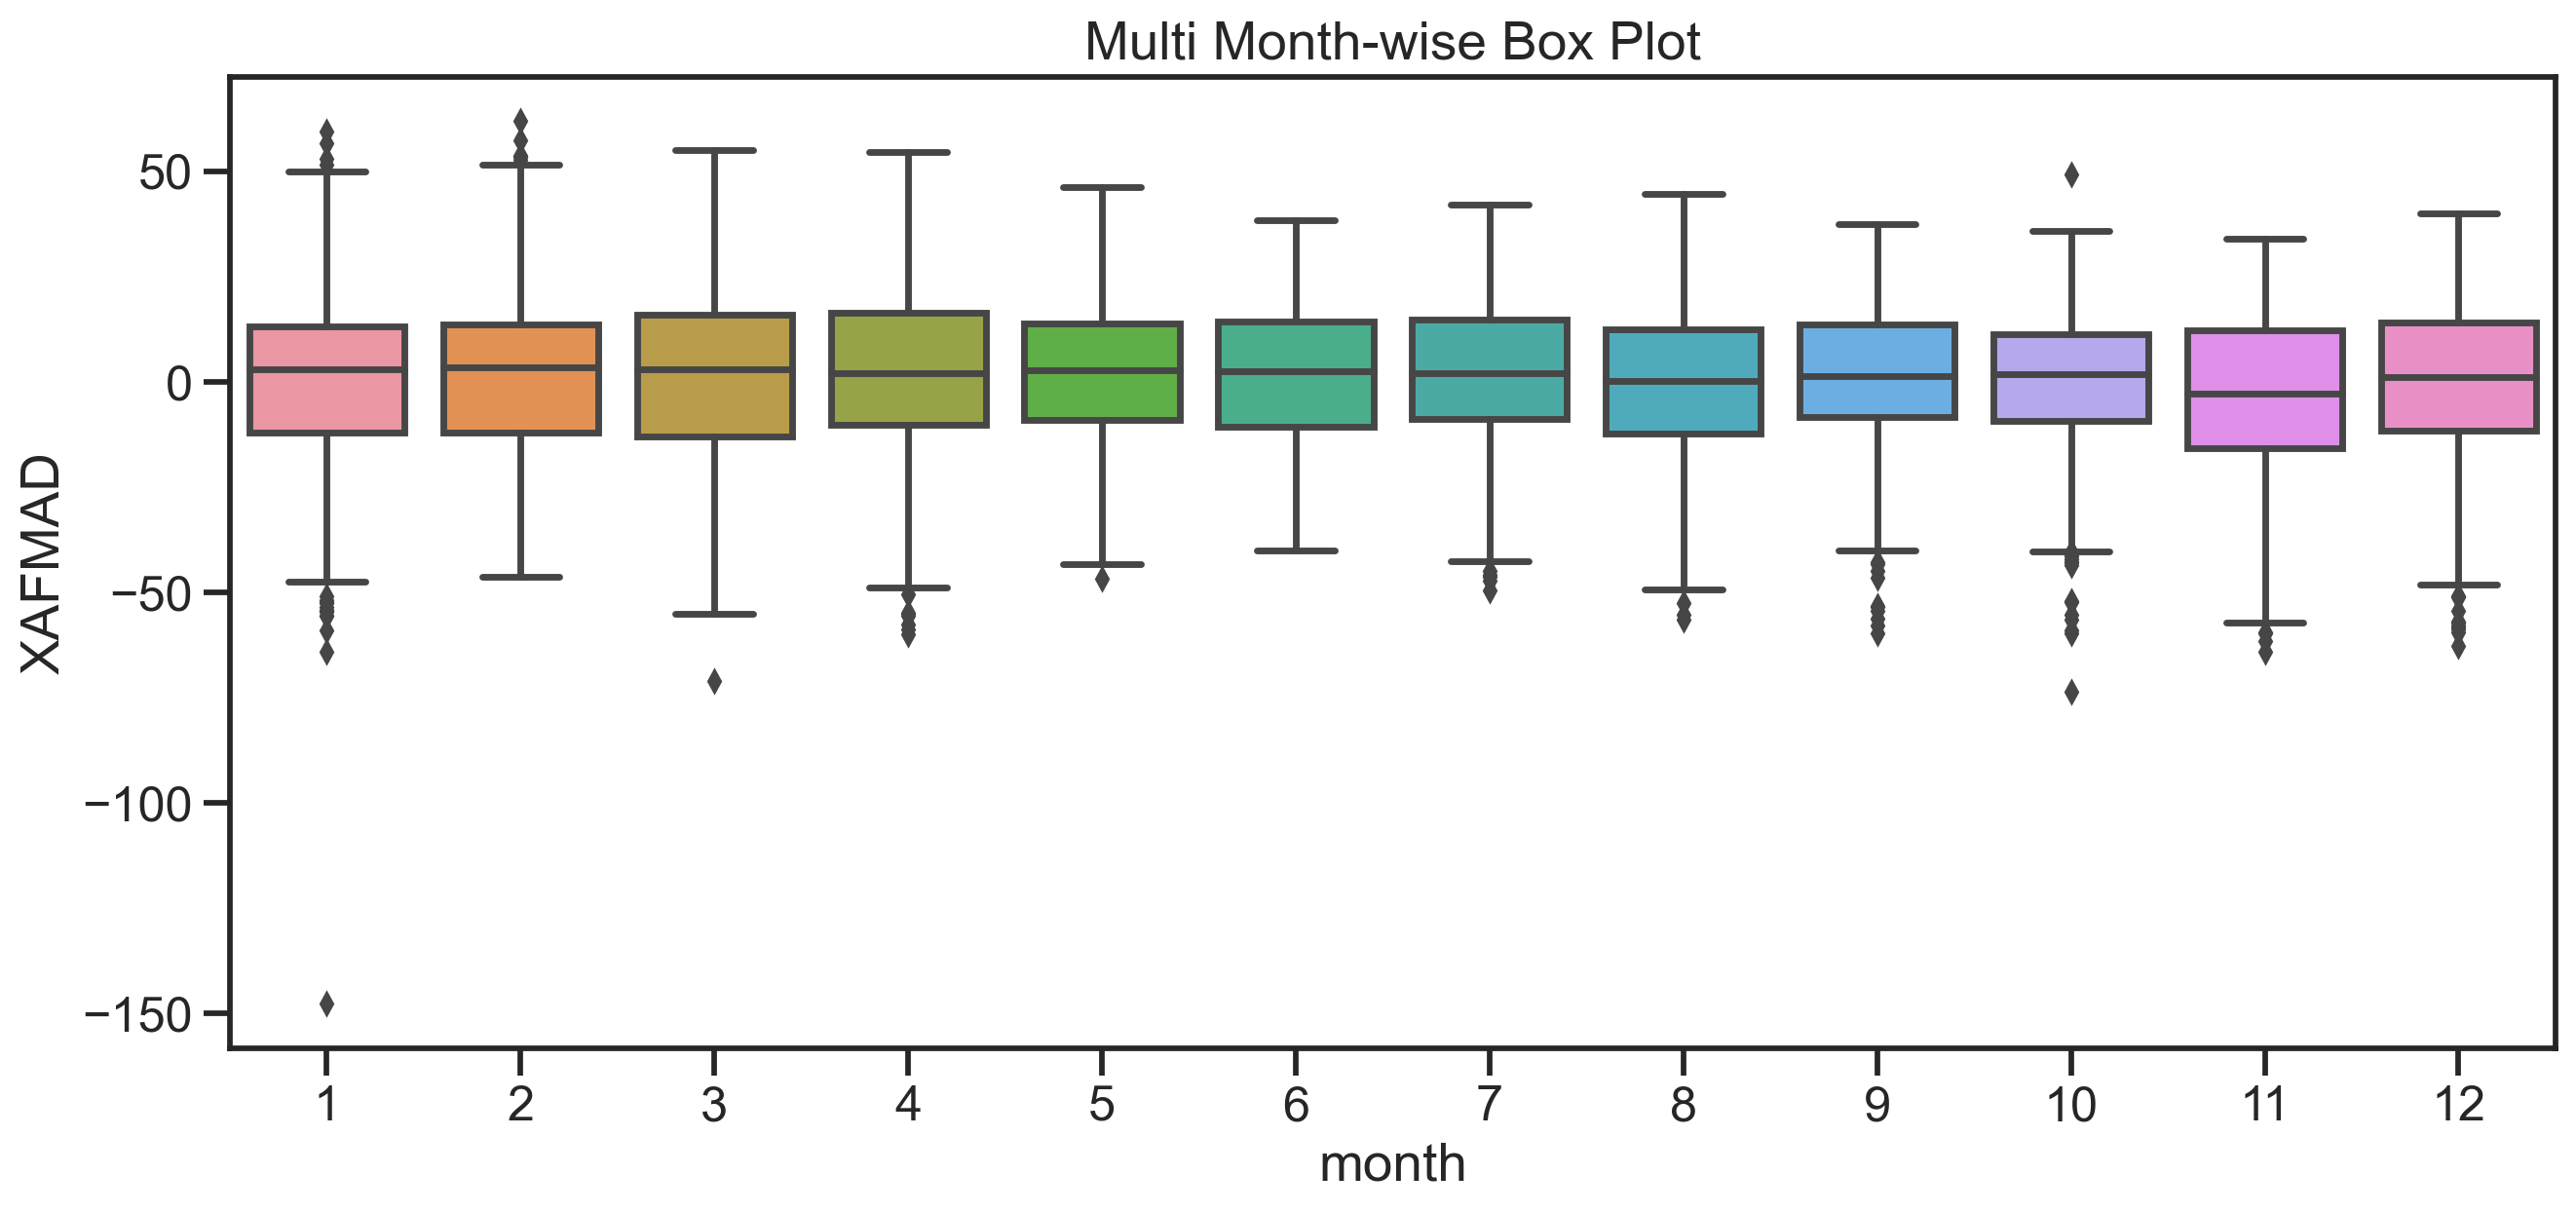

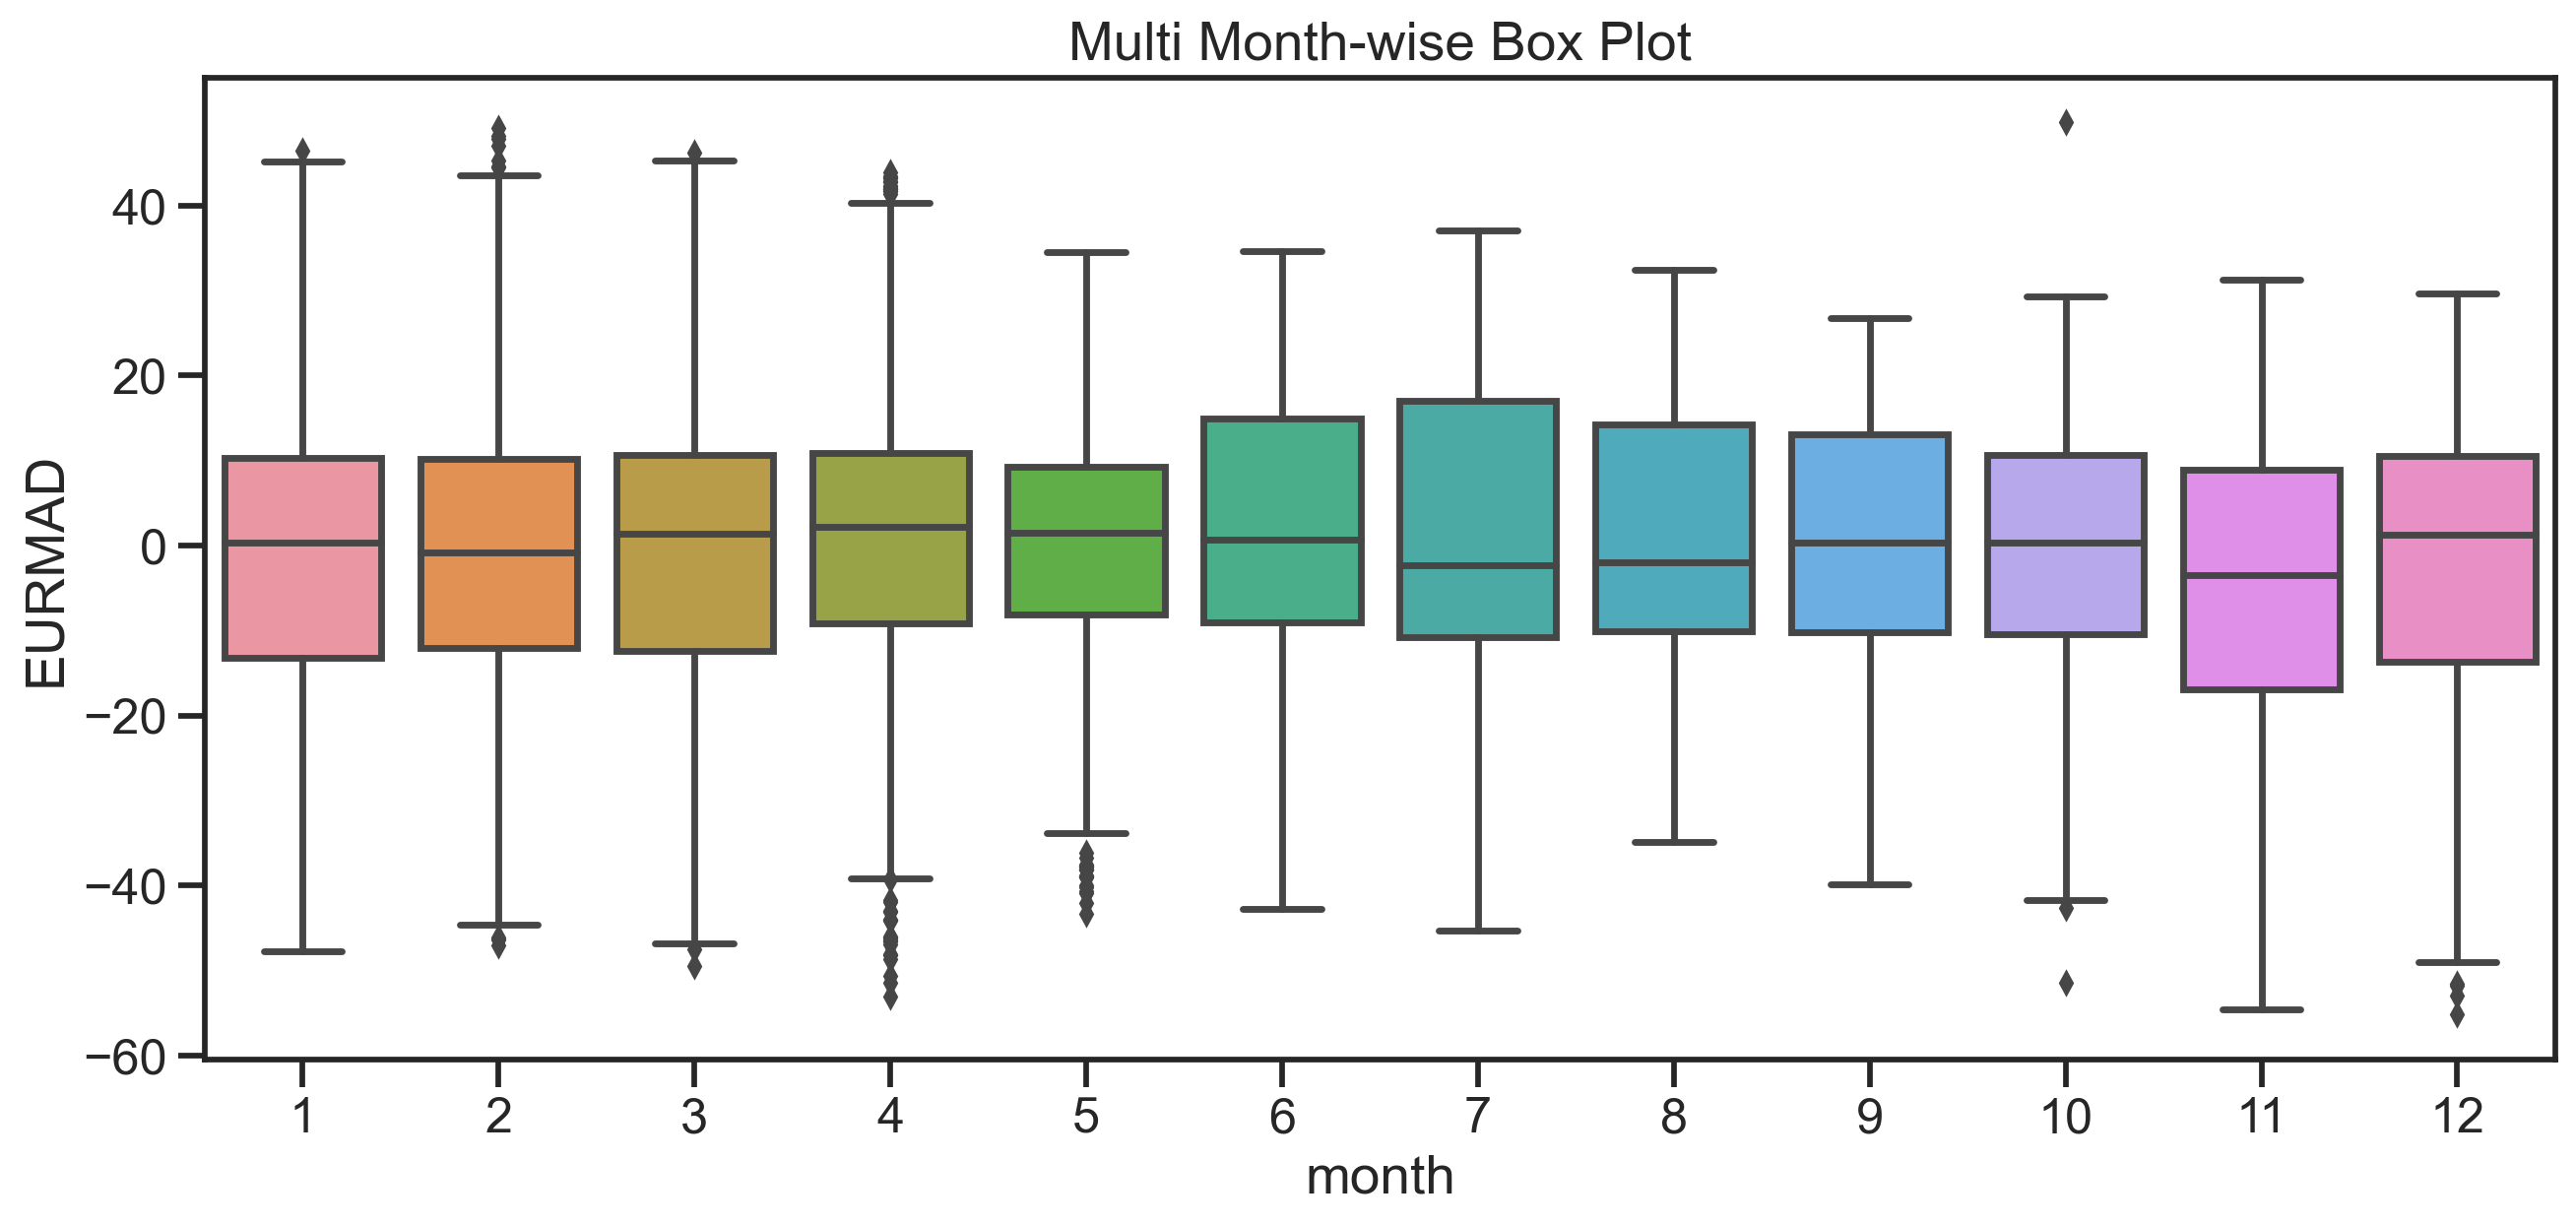

In [77]:
detrended['day'] = [d.day for d in CERL.index]
detrended['month'] = [d.month for d in CERL.index]
detrended['year'] = [d.year for d in CERL.index]
years = detrended['year'].unique()
for ticker in tickers:
    plt.figure(figsize=(14,6))
    sns.boxplot(x='month', y=ticker, data=detrended[[ticker,"day","month","year"]]).set_title("Multi Month-wise Box Plot")
    plt.show()

# Etude d'autocorélation des taux

L'autocorrélation est utilisée pour vérifier le caractère aléatoire des données. Elle permet d'identifier types de données dont la période n'est pas connue. Par exemple, pour les données mensuelles données mensuelles, s'il y a un effet saisonnier régulier, nous espérons voir des décalages massifs de pic après tous les 12 mois.

In [78]:
from pandas.plotting import autocorrelation_plot

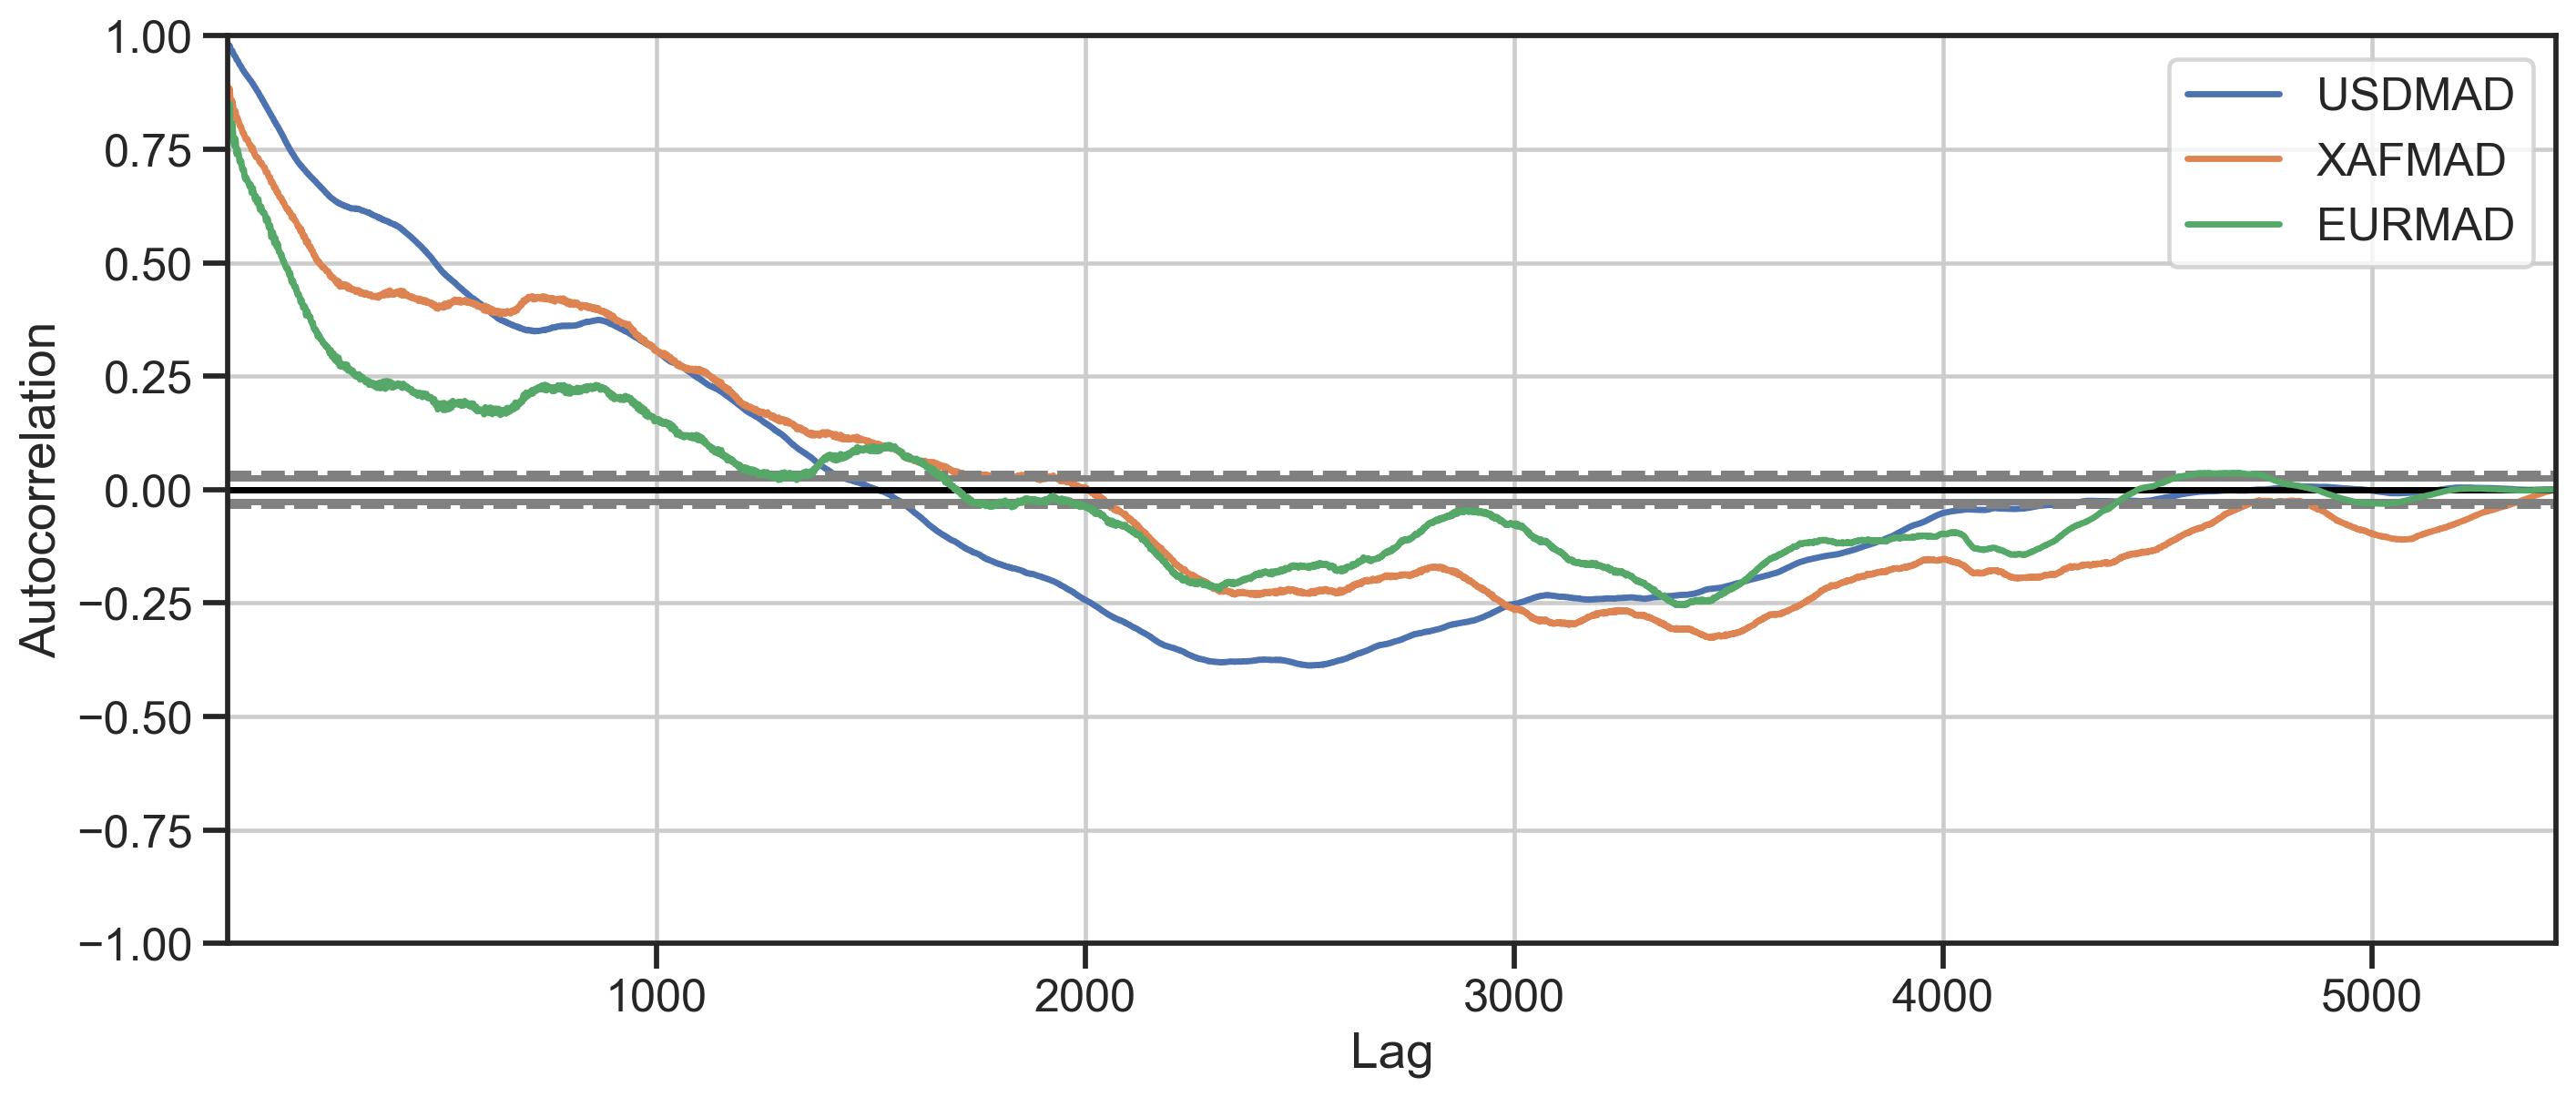

In [79]:
for ticker in tickers:    
    plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
    autocorrelation_plot(CERL[ticker].tolist(), label=ticker)
    plt.legend()

# Décomposition de la série temporelle

La décomposition est une méthode utilisée pour isoler les données de séries chronologiques en différents éléments tels que les tendances, la saisonnalité, la variance cyclique et les résidus. Nous pouvons exploiter la décomposition saisonnière à partir d'un modèle de statistiques. Extraction des variations cycliques à l'aide d'un filtre HP Caractéristiques des séries temporelles pour décomposer les données en leurs éléments constitutifs, en considérant les séries comme additives ou multiplicatives.
- Tendances(T(t)) signifie une augmentation ou une diminution de la  valeur des données.
- Saisonnalité(S[t]) signifie la répétition d'un cycle à court terme  des données.
- Variations cycliques(c[t]) : fluctuation des tendances à long terme des données.
- Résidus(e[t]) signifie une variation irrégulière des données ts.

Le modèle additif fonctionne avec des tendances linéaires de données de séries temporelles telles que des changements constants dans le temps. La formule du modèle additif est la suivante :

Y[t] = T[t] + S[t] + c[t] + e[t]

Le modèle multiplicatif fonctionne avec un type de données non linéaires telles que quadrique ou exponentiel. La formule du modèle multiplicatif est la suivante :

Y[t] = T[t] * S[t] * c[t] * e[t]

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

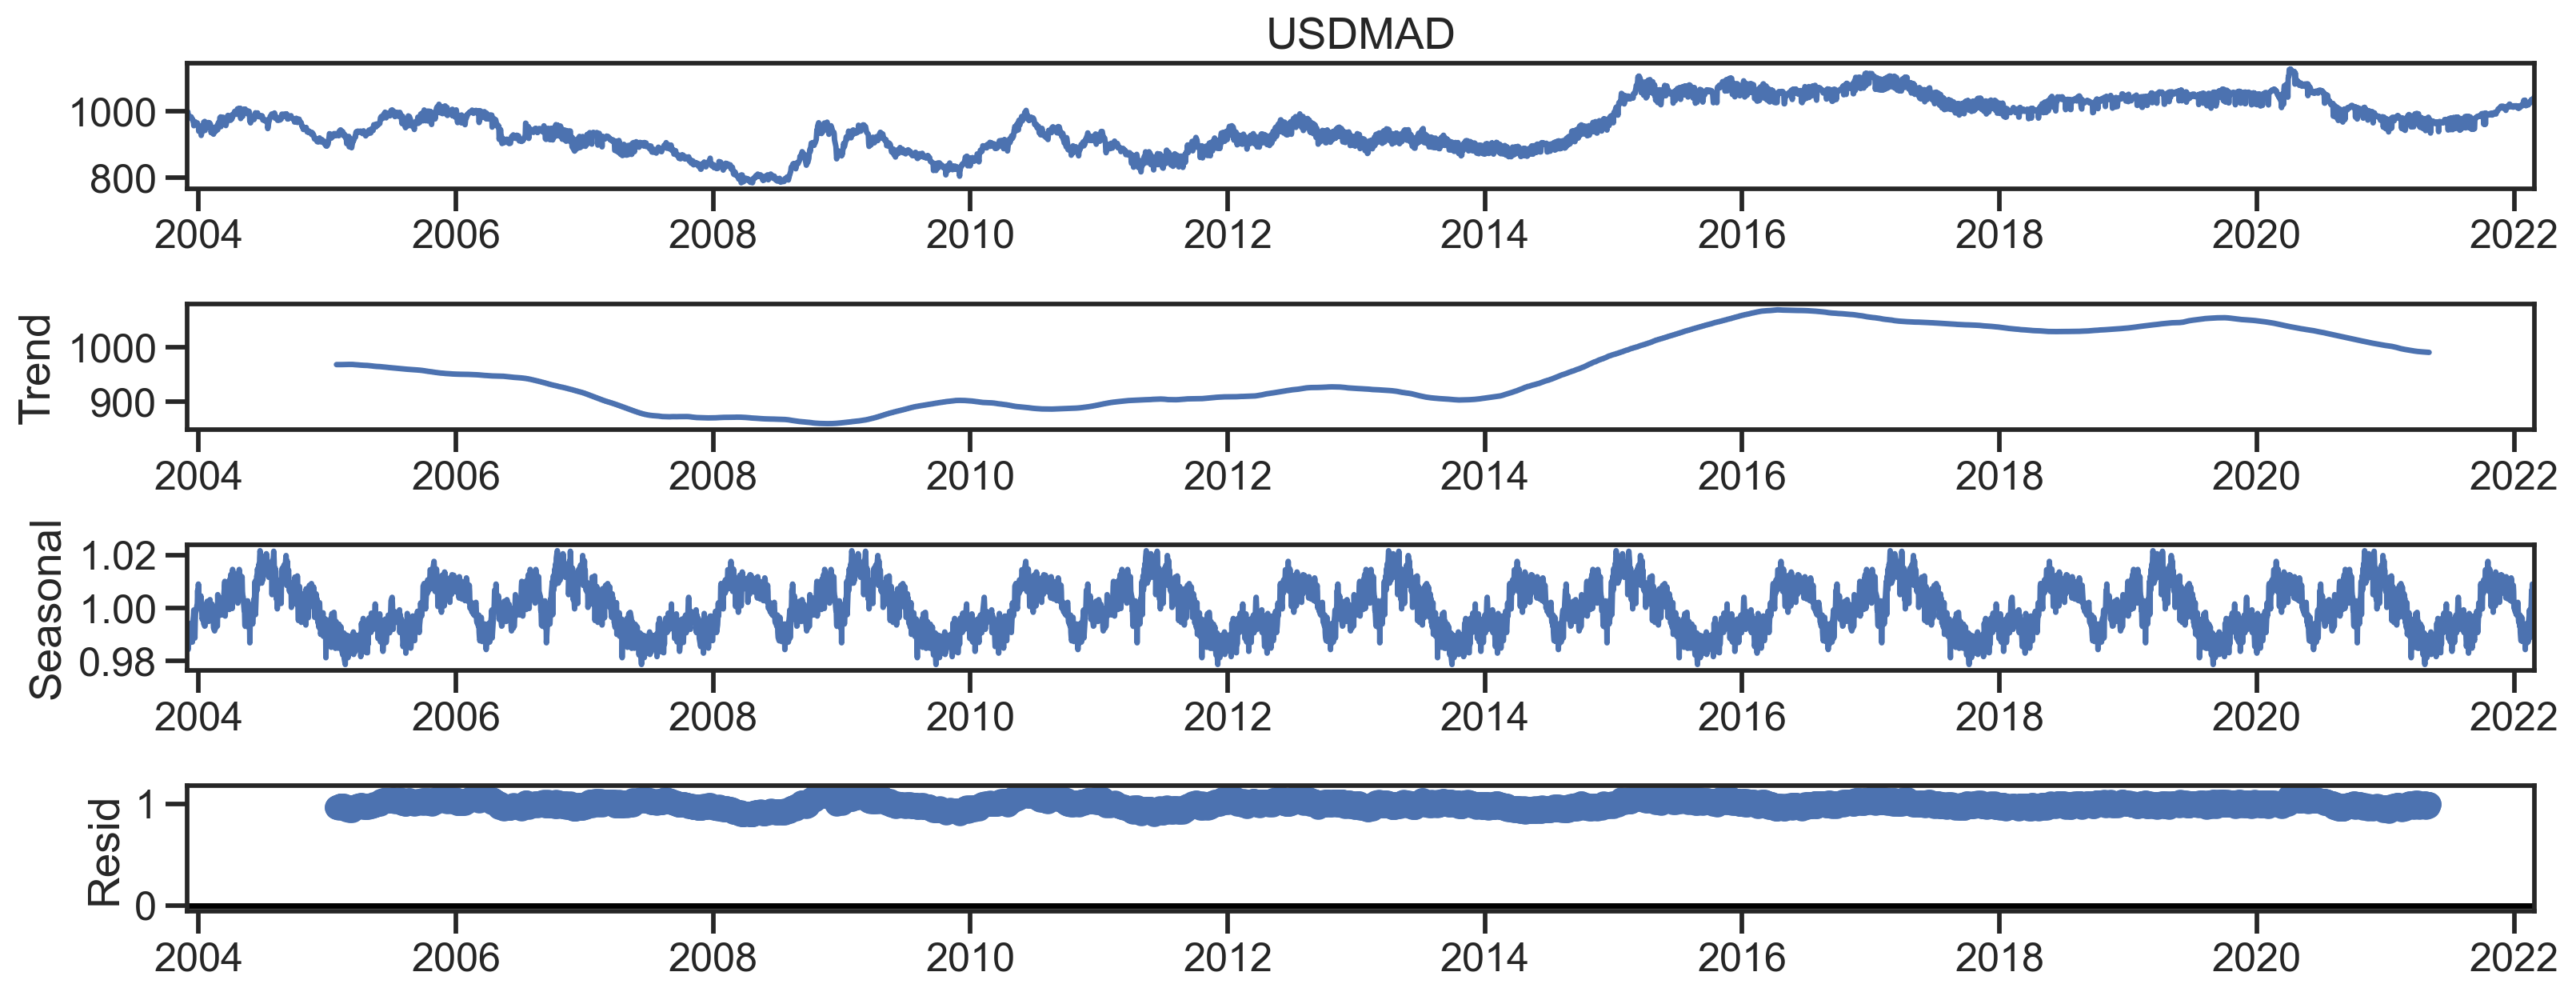

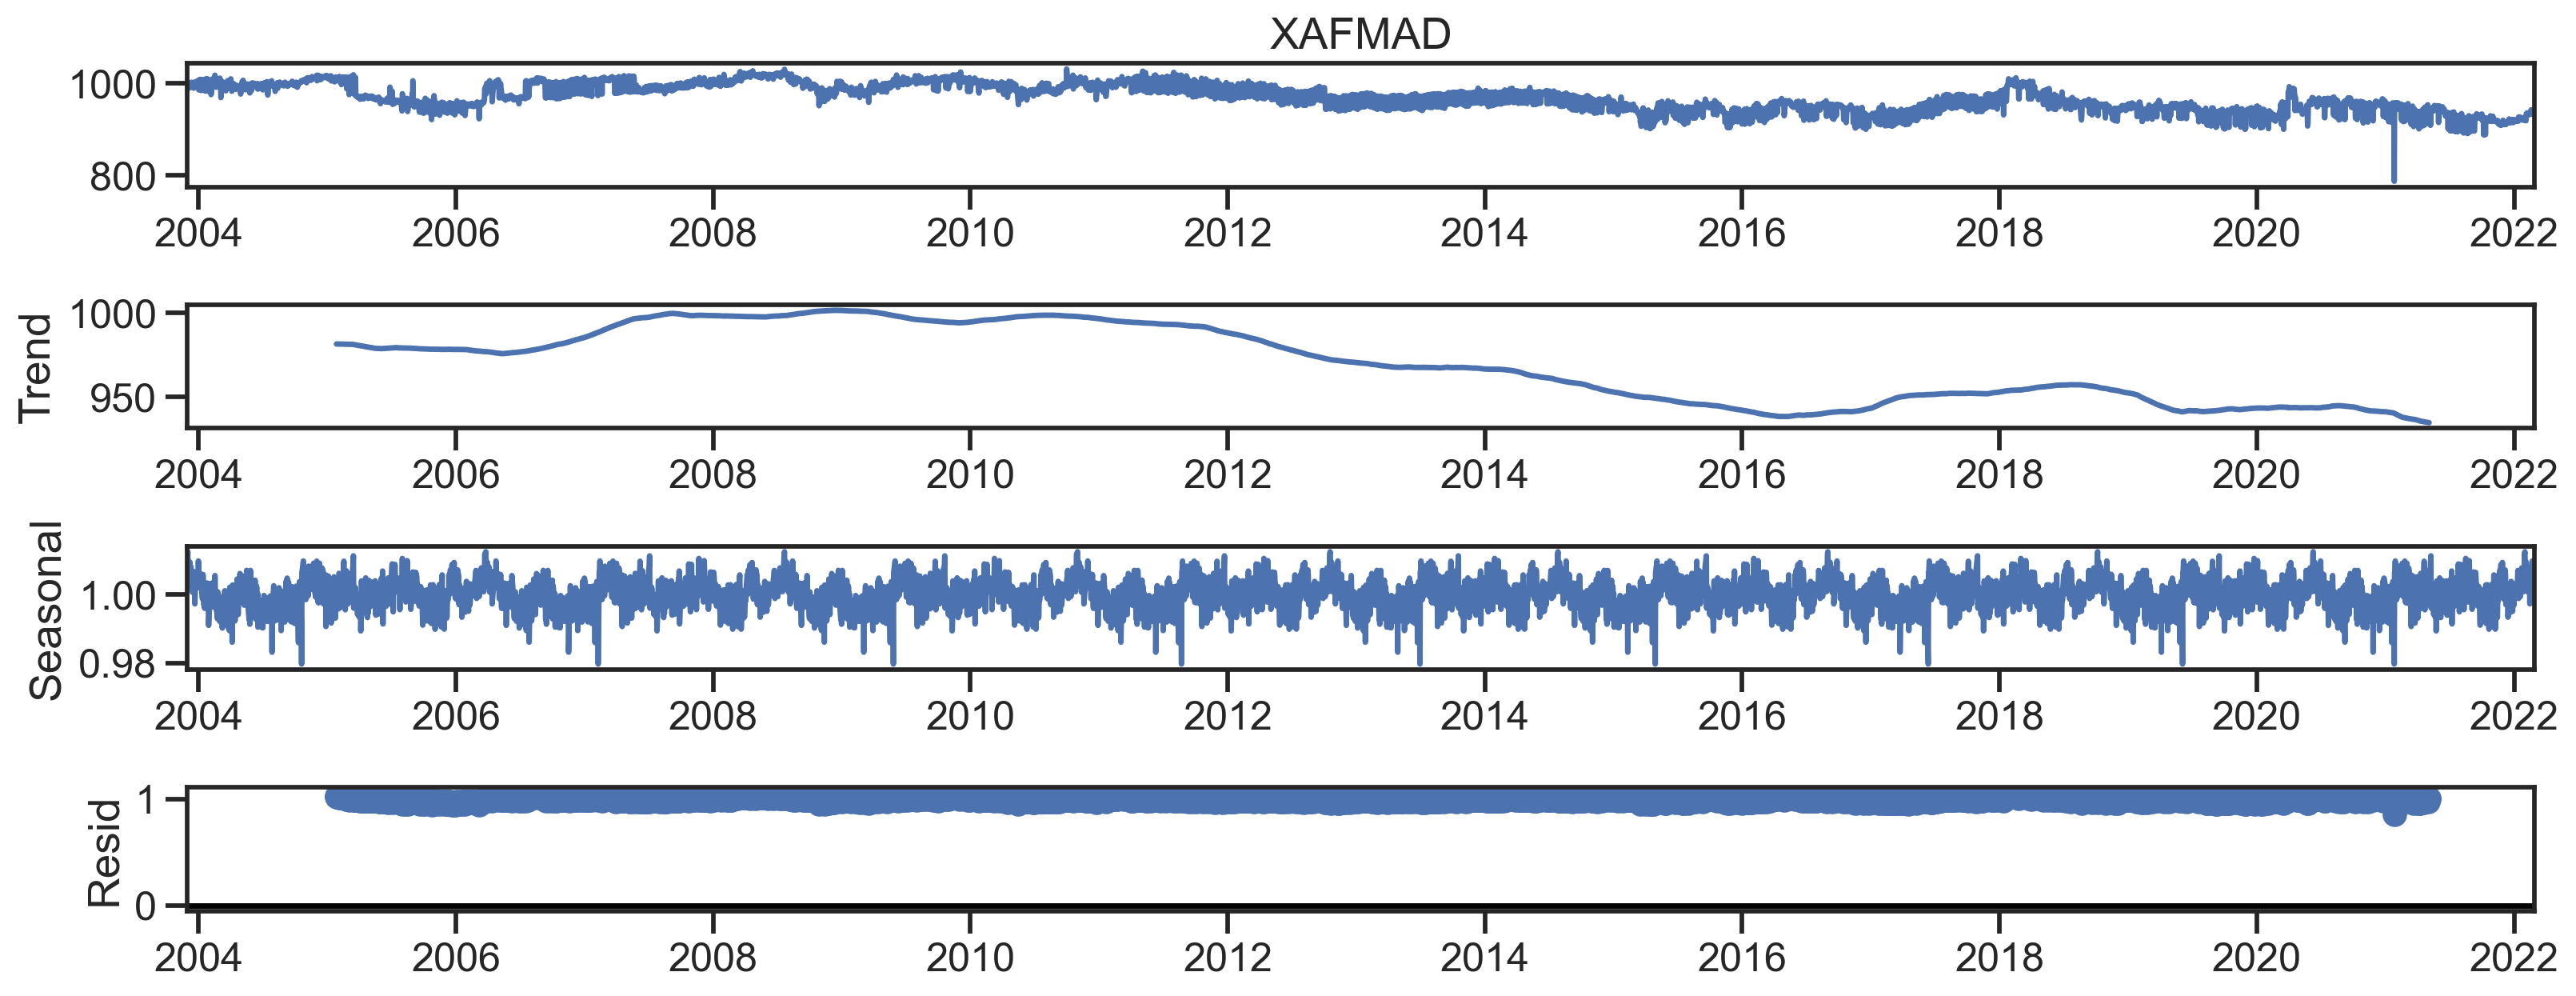

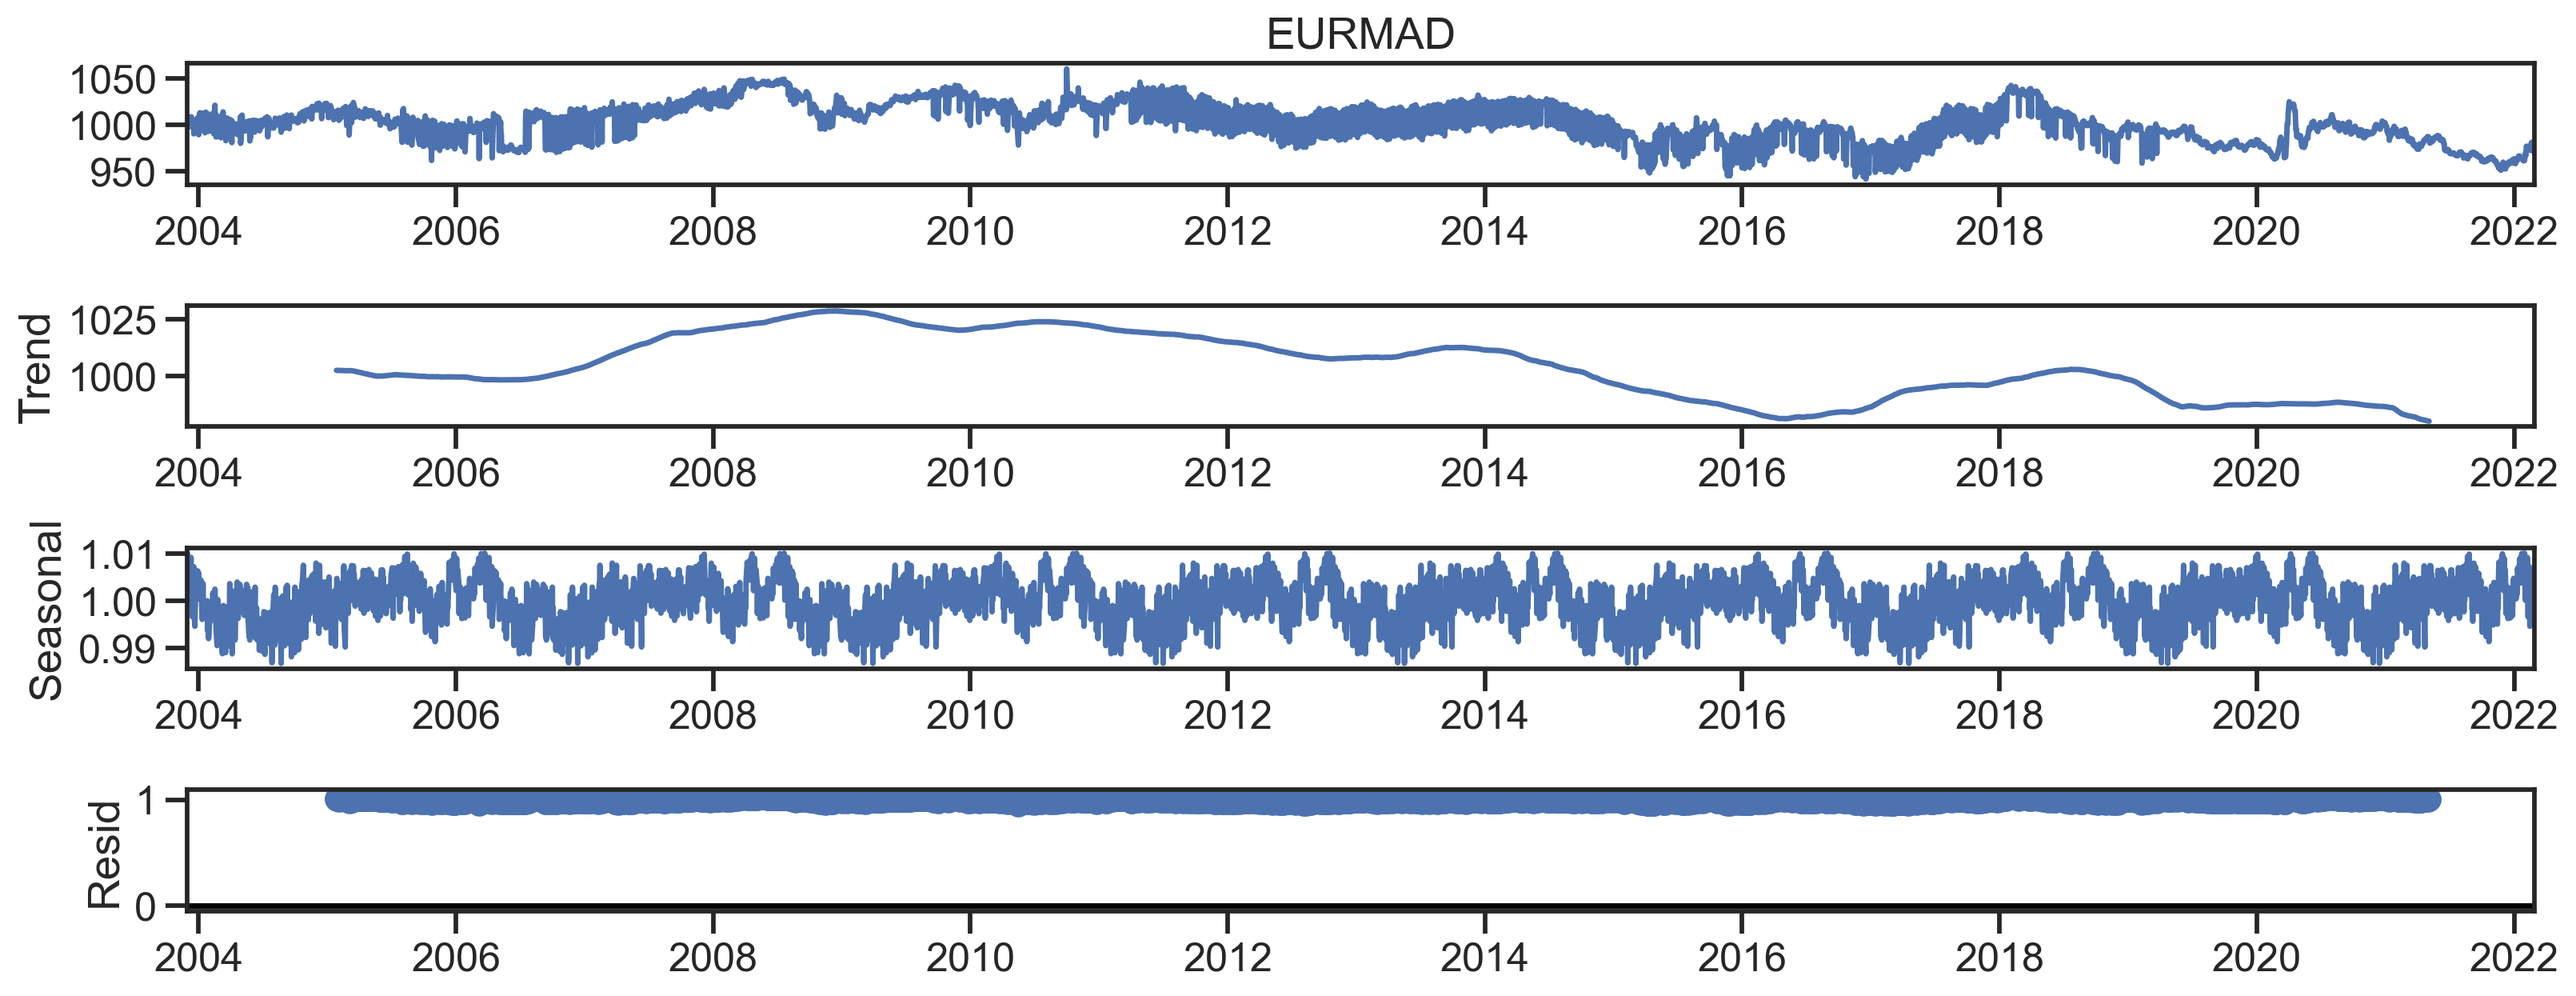

In [81]:
for ticker in tickers:
    seasonal_decompose(CERL[ticker], model='mul', period=600).plot()
    plt.show()

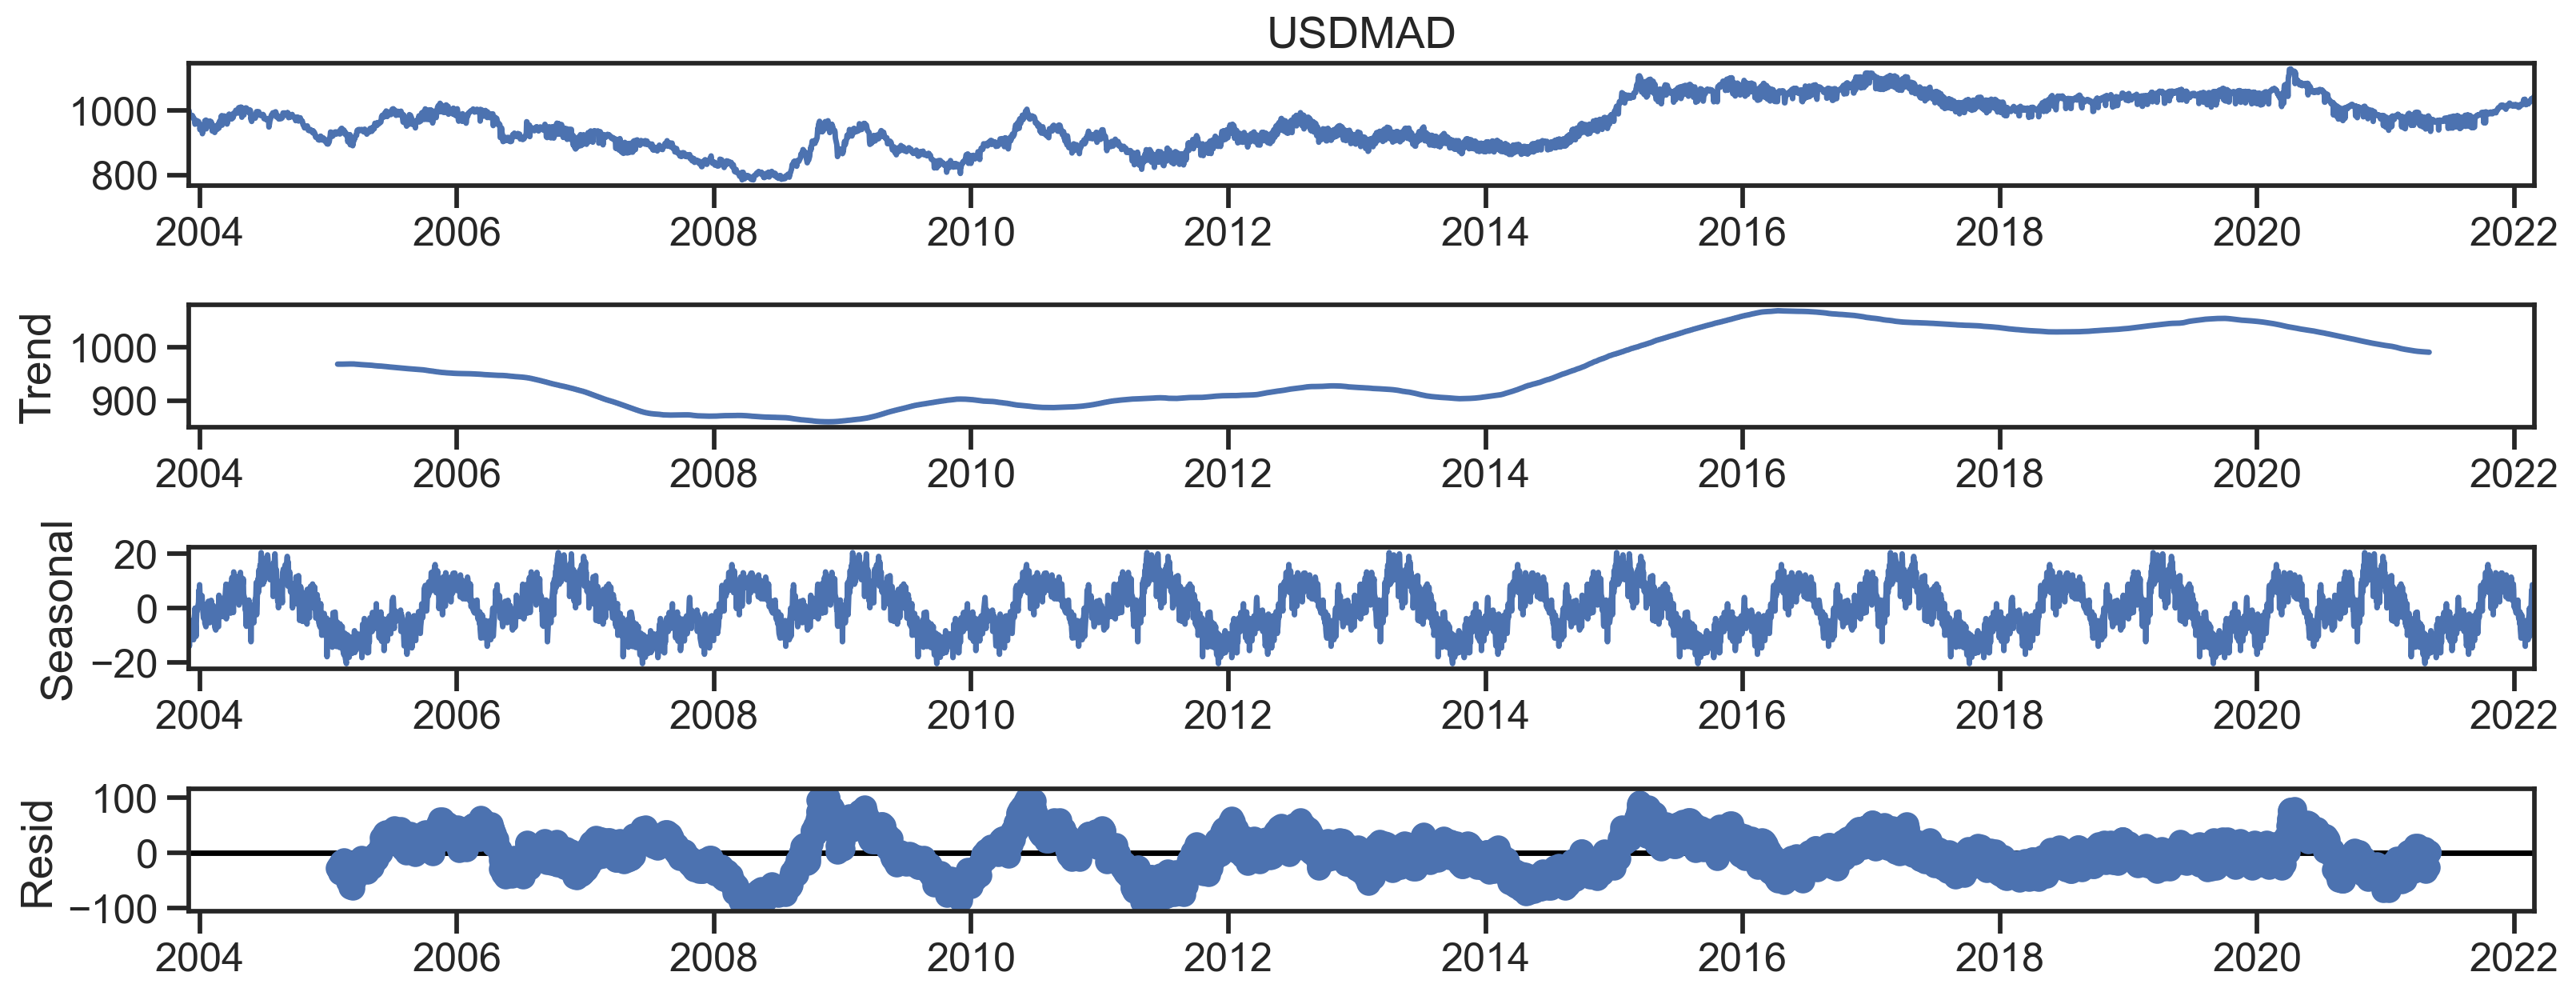

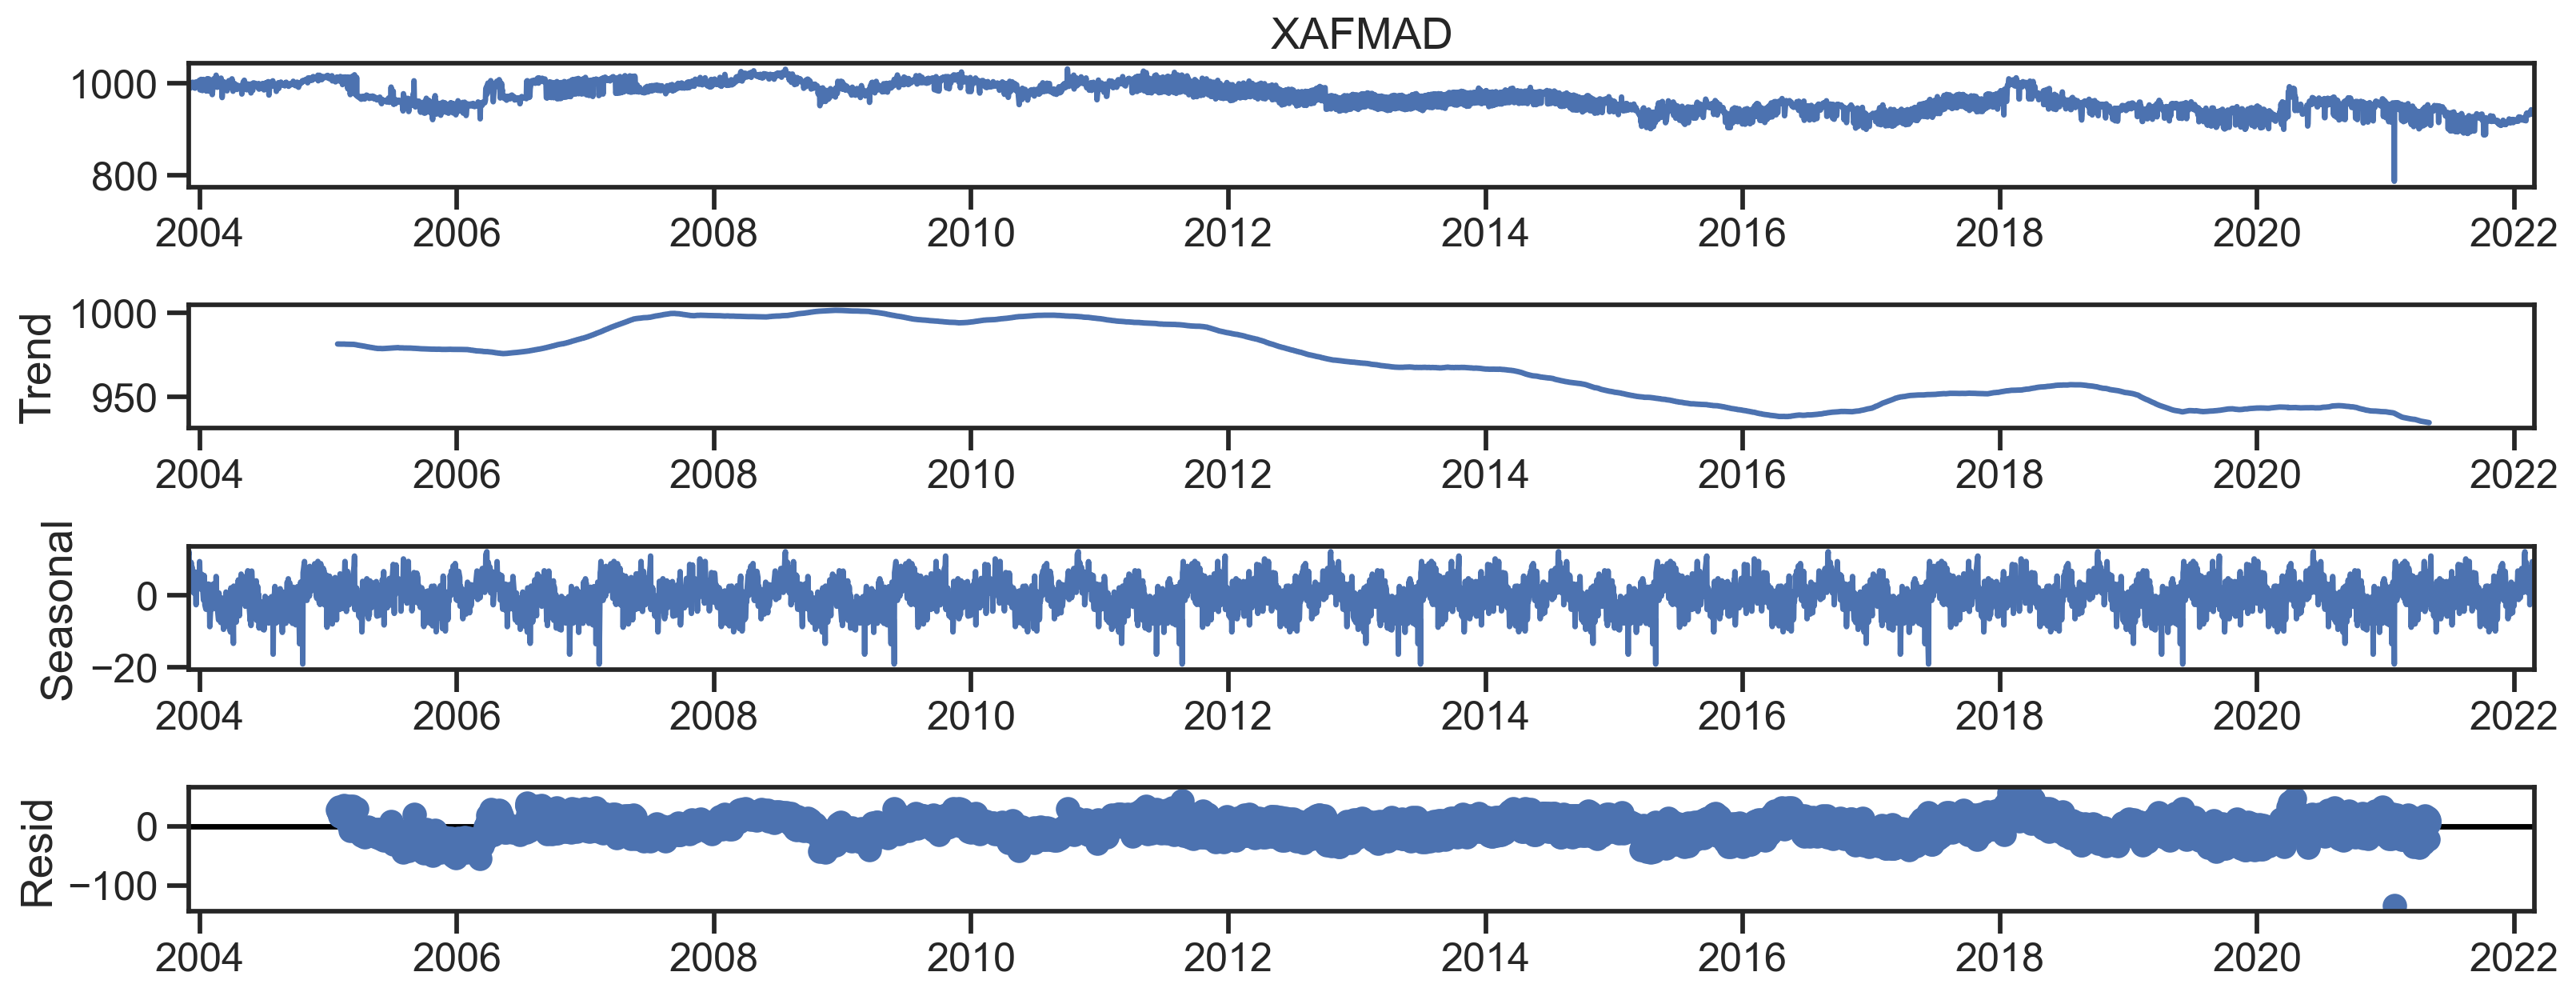

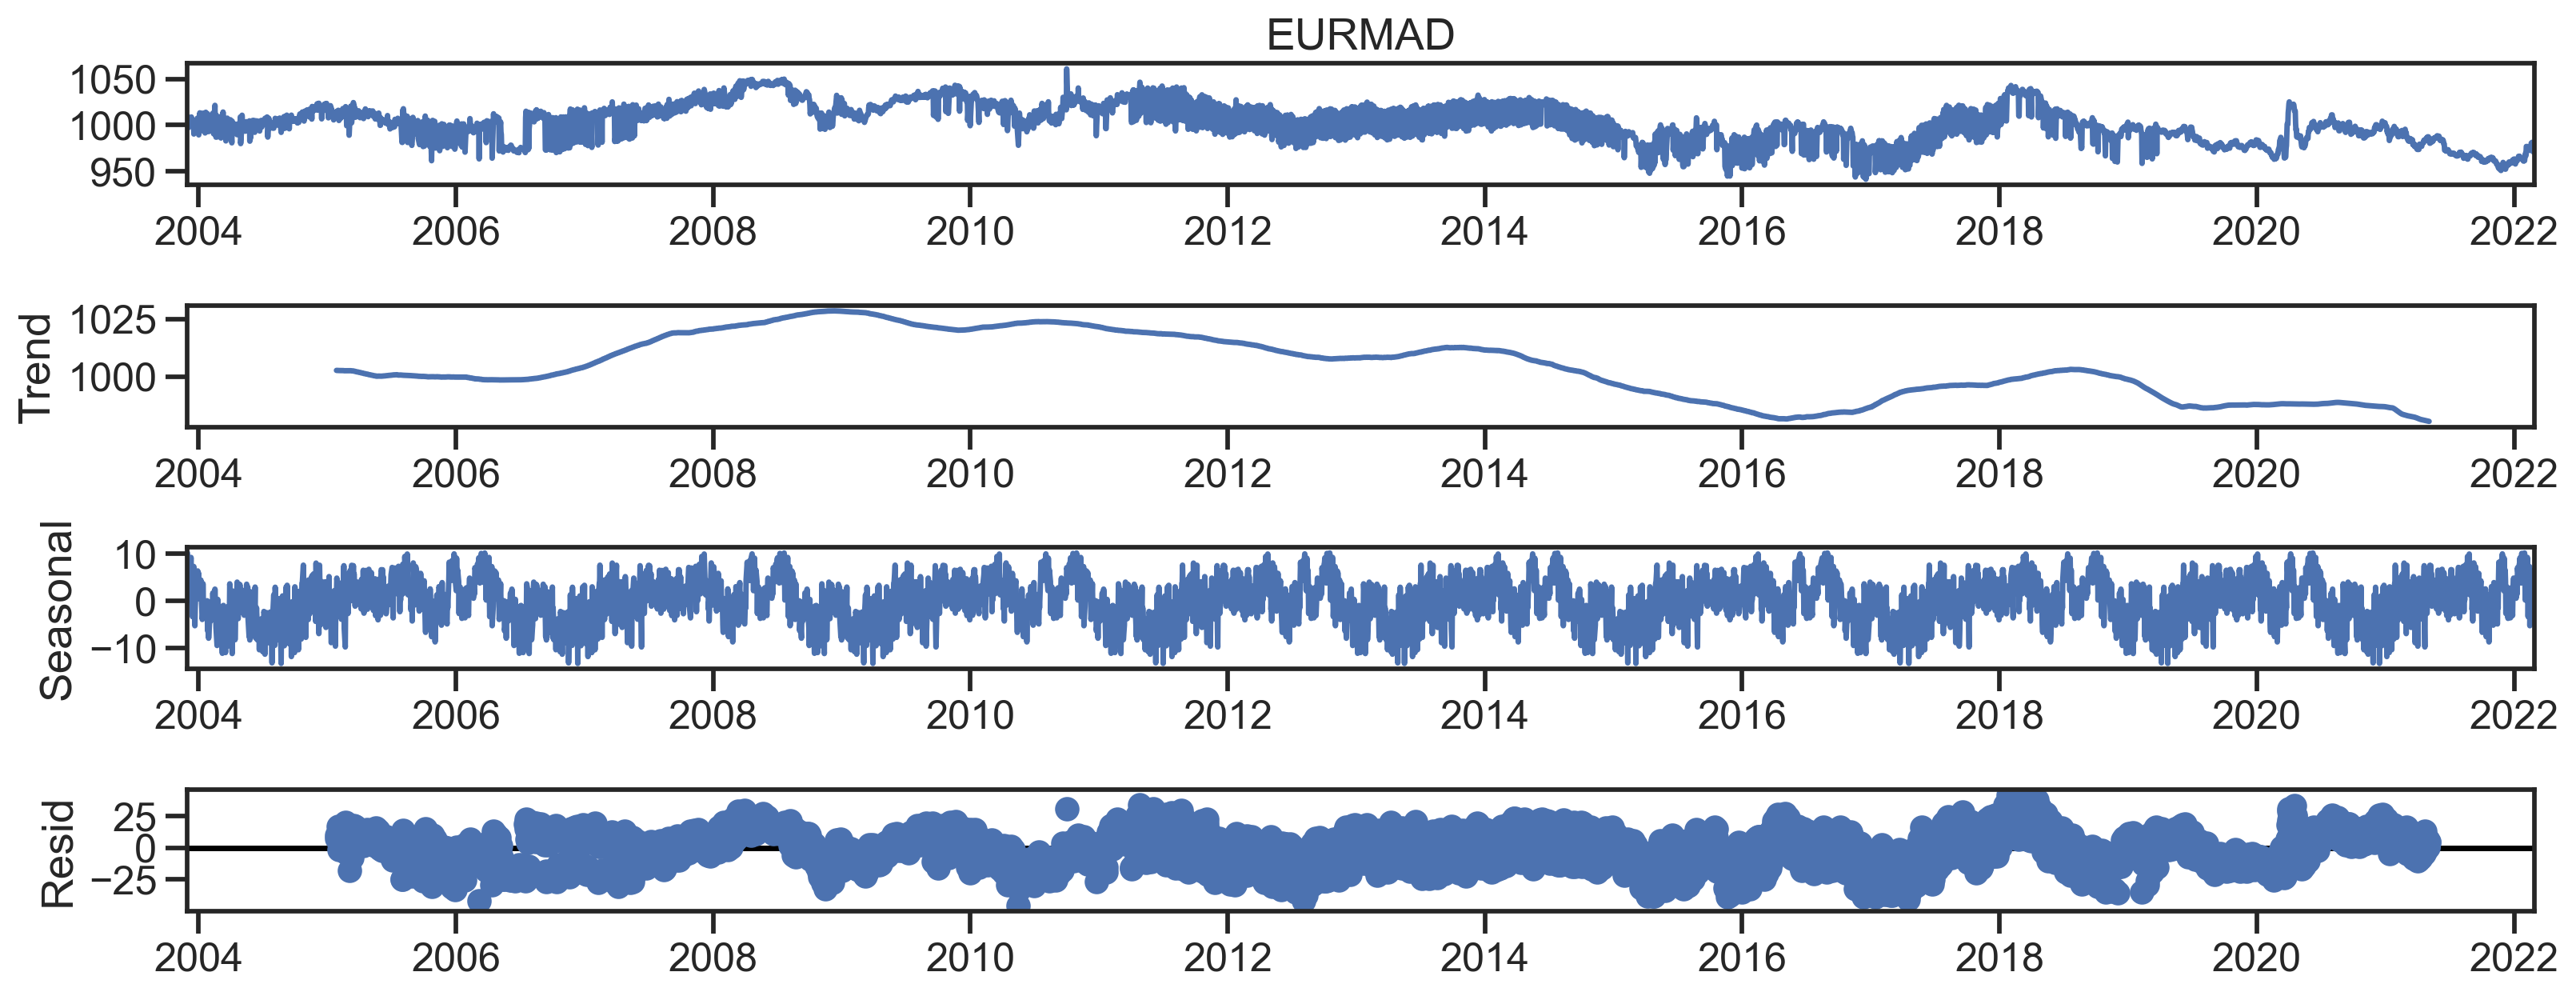

In [82]:
for ticker in tickers:
    seasonal_decompose(CERL[ticker], model='sum', period=600).plot()
    plt.show()

# Conclusion 

L'analyse statistique des taux de change nous a permis de remarquer que la distribution des logrendements ne suivait pas une loi normale. Il nous faut donc retirer les valeurs extrêmes pour ensuite obtenir une loi normale pour quelques devises. Pour d'autres devises, l'assymetrie des log-rendements nous pousse a envisager d'autre modèles pour modeliser ce taux : l'introduction d'un processus de Jump diffusion dans un modèle suivant une loi gaussienne ou une autre loi.